# Flood Prediction Analysis

## 1. Data Loading

In [44]:
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [7]:
df_train = pd.read_csv("train_flood.csv")
df_train

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117952,1117952,3,3,4,10,4,5,5,7,10,...,7,8,7,2,2,1,4,6,4,0.495
1117953,1117953,2,2,4,3,9,5,8,1,3,...,9,4,4,3,7,4,9,4,5,0.480
1117954,1117954,7,3,9,4,6,5,9,1,3,...,5,5,5,5,6,5,5,2,4,0.485
1117955,1117955,7,3,3,7,5,2,3,4,6,...,6,8,5,3,4,6,7,6,4,0.495


In [8]:
df_test = pd.read_csv("test_flood.csv")
df_test

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,1117957,4,6,3,5,6,7,8,7,8,...,8,5,7,5,6,3,6,4,4,5
1,1117958,4,4,2,9,5,5,4,7,5,...,2,4,7,4,5,1,7,4,4,3
2,1117959,1,3,6,5,7,2,4,6,4,...,7,9,2,5,5,2,3,6,8,3
3,1117960,2,4,4,6,4,5,4,3,4,...,7,8,4,6,7,6,4,2,4,4
4,1117961,6,3,2,4,6,4,5,5,3,...,4,3,2,6,4,6,8,4,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745300,1863257,5,4,8,3,5,4,4,5,5,...,5,6,1,3,5,6,4,4,6,6
745301,1863258,4,4,2,12,4,3,4,3,5,...,3,7,4,4,3,5,5,3,5,4
745302,1863259,5,7,9,5,5,6,7,5,5,...,6,11,3,11,4,5,9,5,5,4
745303,1863260,4,7,6,3,5,2,3,8,6,...,6,6,8,6,2,3,8,7,5,5


## 2. Data Info

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

## 3. Analisis Deskriptif

In [10]:
df_train.describe(include='all')

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,...,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06
mean,5.589780e+05,4.921450e+00,4.926671e+00,4.955322e+00,4.942240e+00,4.942517e+00,4.934093e+00,4.955878e+00,4.927791e+00,4.942619e+00,...,4.946893e+00,4.953999e+00,4.931376e+00,4.929032e+00,4.925907e+00,4.927520e+00,4.950859e+00,4.940587e+00,4.939004e+00,5.044803e-01
std,3.227265e+05,2.056387e+00,2.093879e+00,2.072186e+00,2.051689e+00,2.083391e+00,2.057742e+00,2.083063e+00,2.065992e+00,2.068545e+00,...,2.072333e+00,2.088899e+00,2.078287e+00,2.082395e+00,2.064813e+00,2.074176e+00,2.068696e+00,2.081123e+00,2.090350e+00,5.102610e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.850000e-01
25%,2.794890e+05,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,...,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.700000e-01
50%,5.589780e+05,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.050000e-01
75%,8.384670e+05,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,...,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.400000e-01
max,1.117956e+06,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.600000e+01,...,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,1.600000e+01,1.600000e+01,7.250000e-01


## 4. Cek Missing Value

In [11]:
missing_values = df_train.isna().sum()
missing_values [missing_values > 0]

Series([], dtype: int64)

## 5. Analisa Outliers

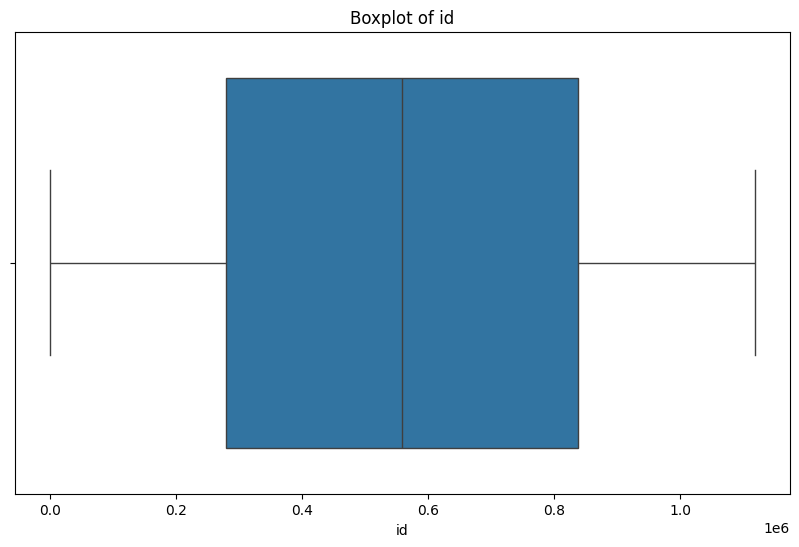

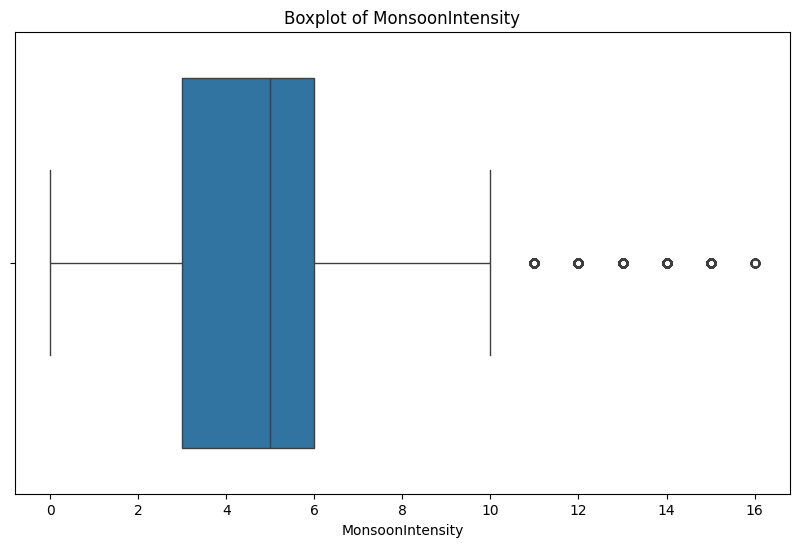

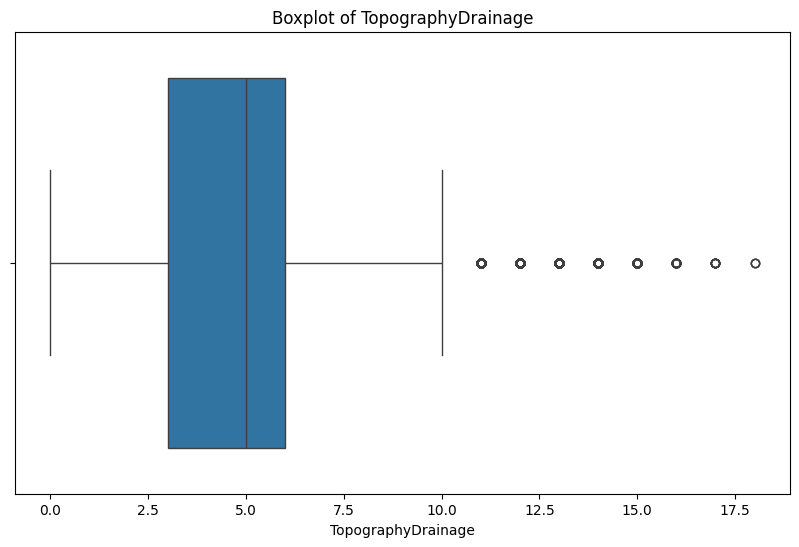

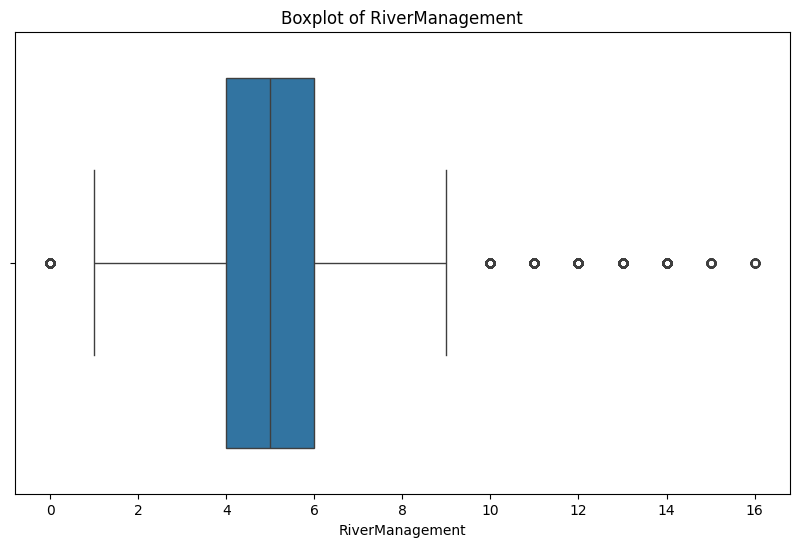

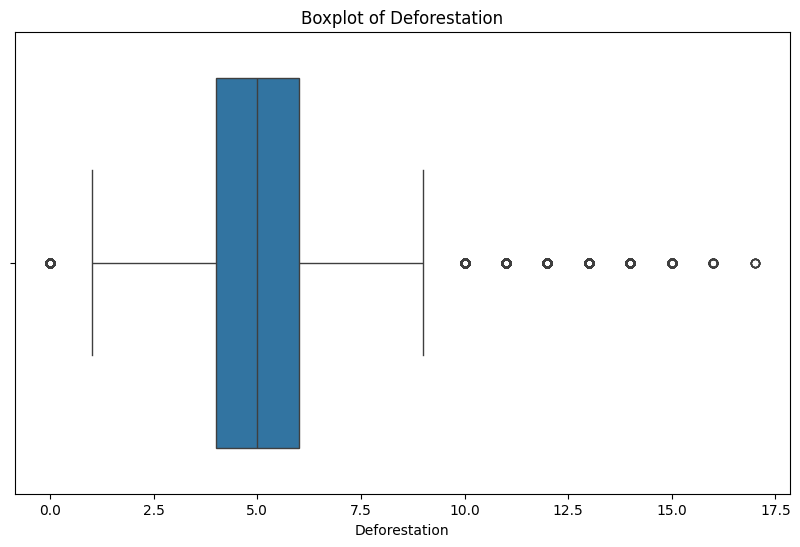

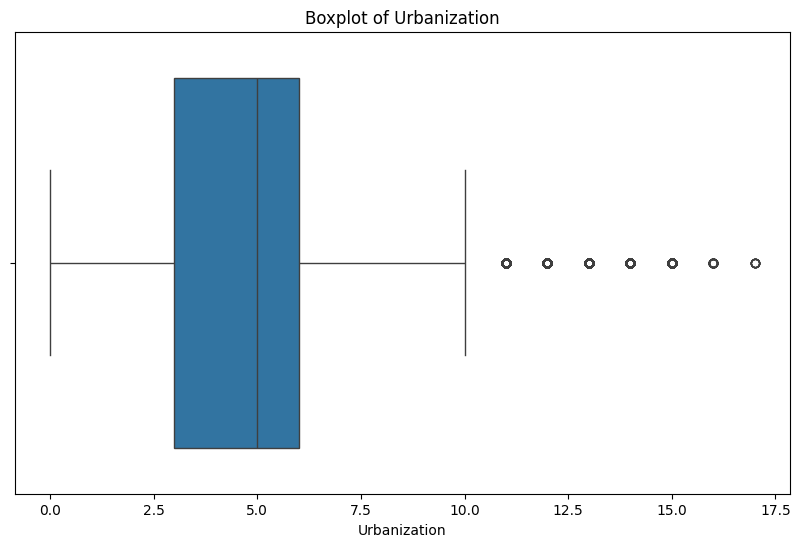

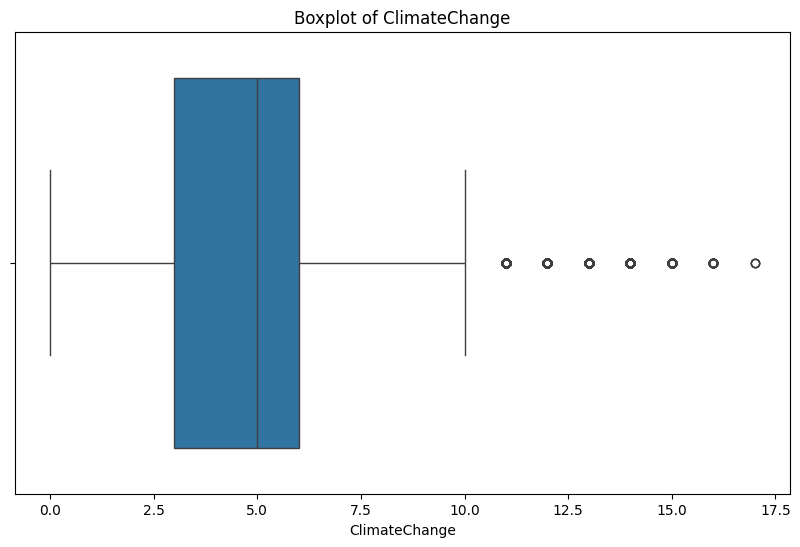

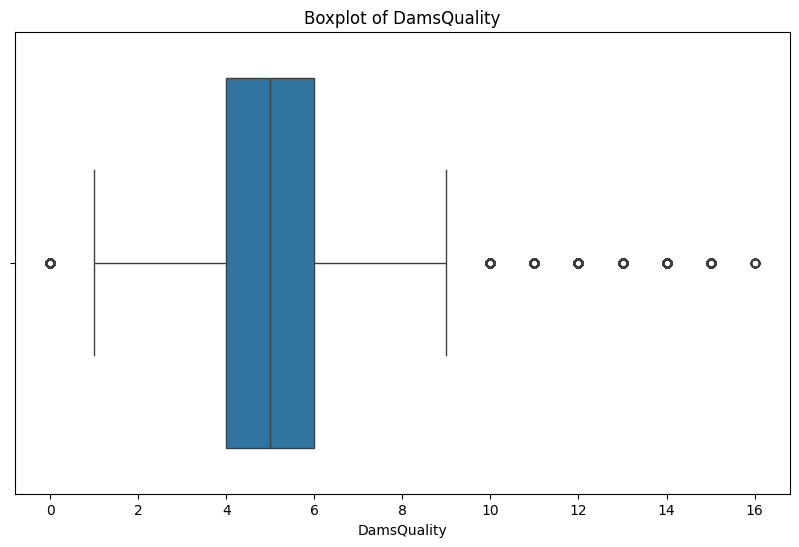

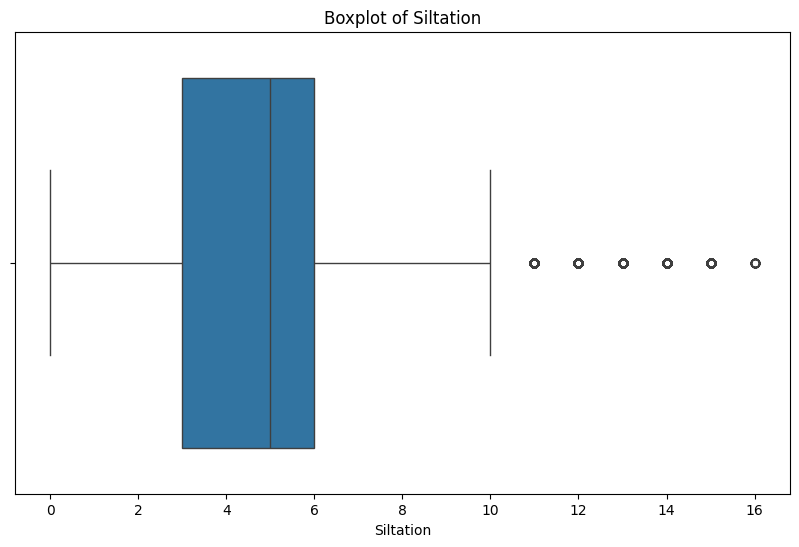

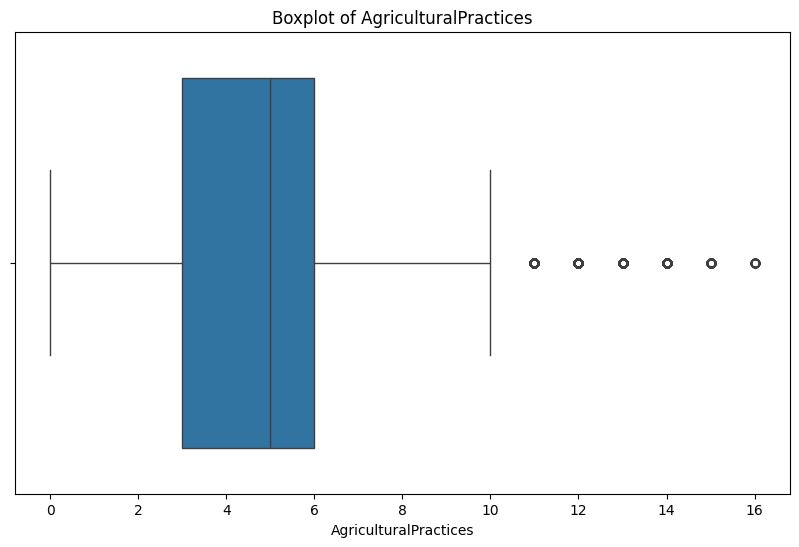

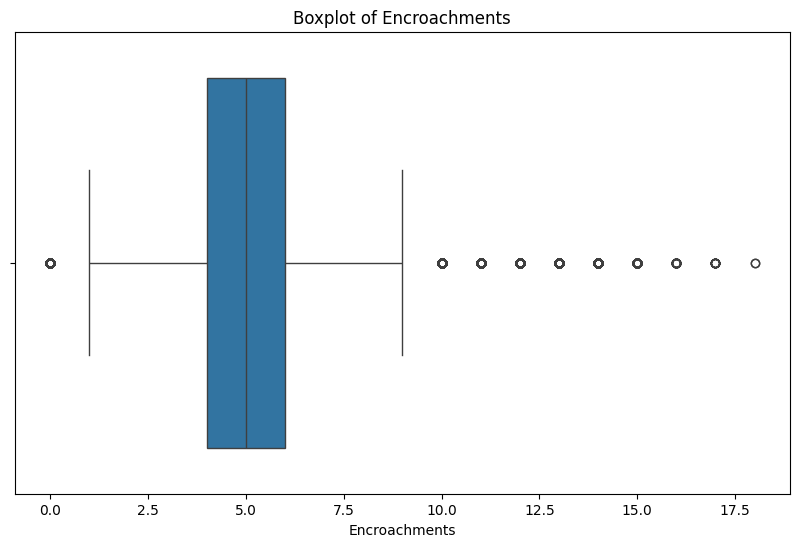

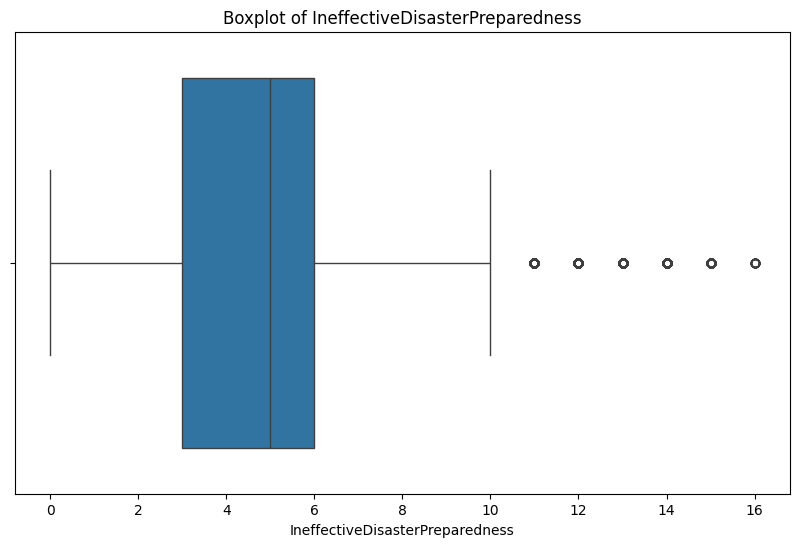

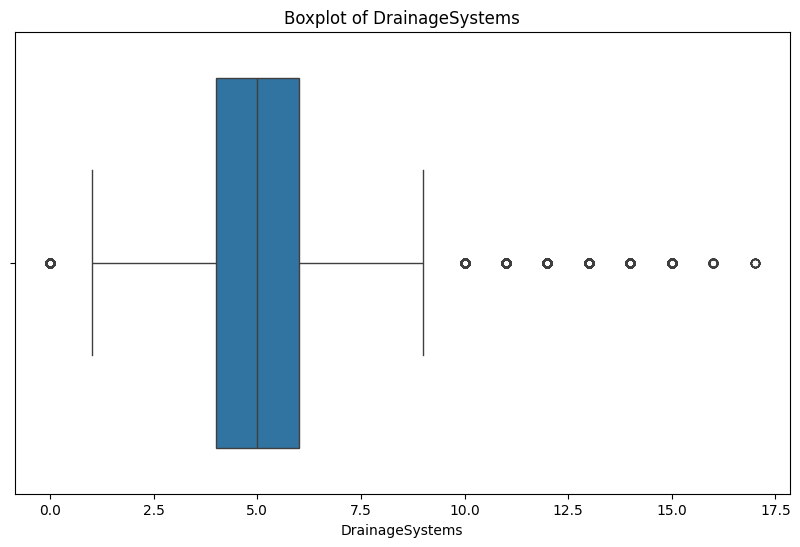

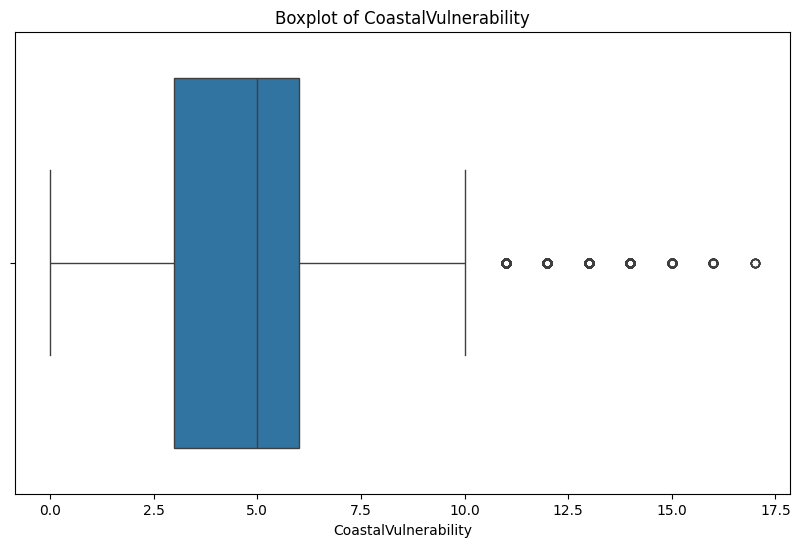

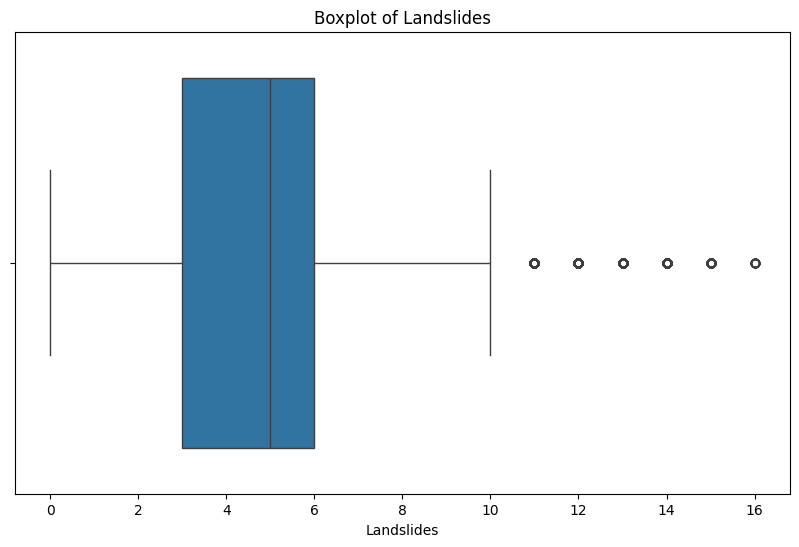

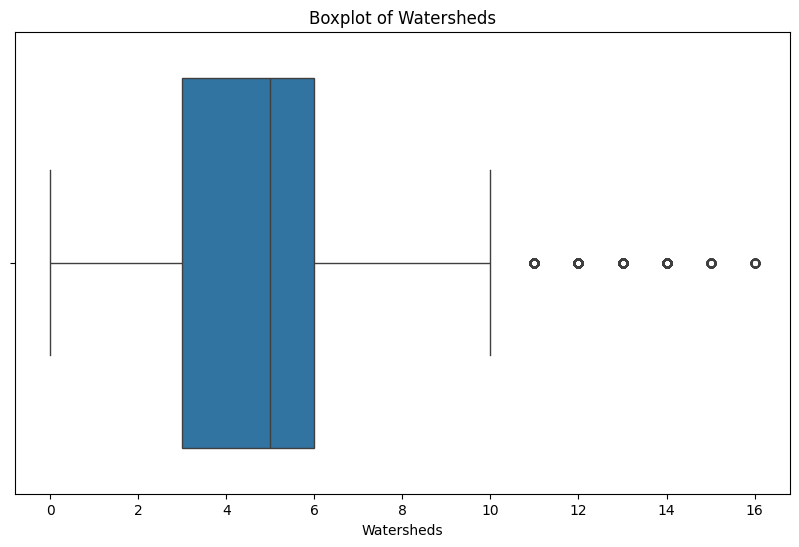

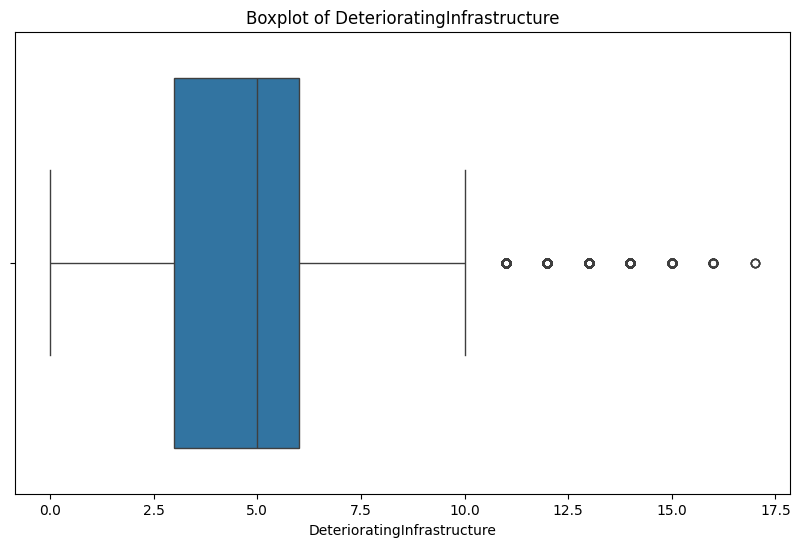

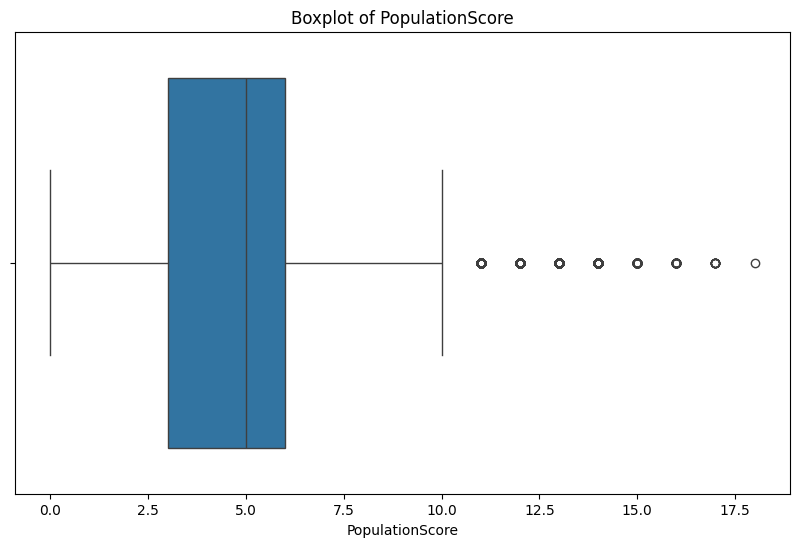

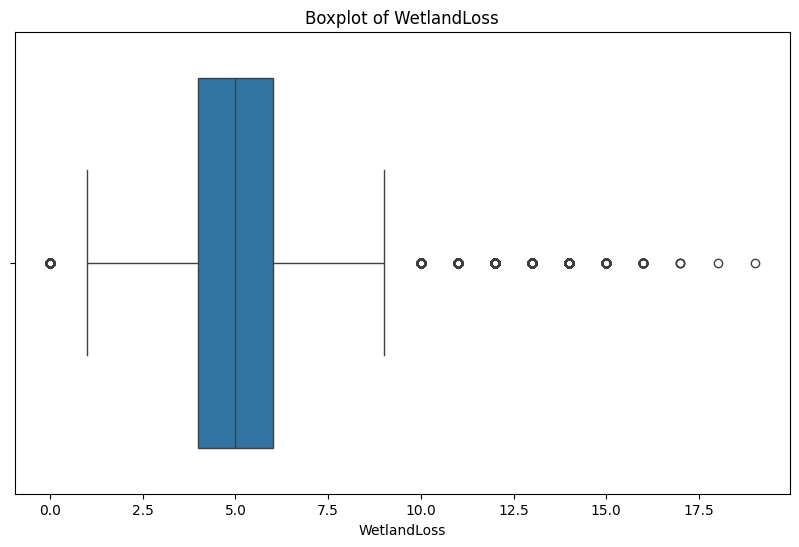

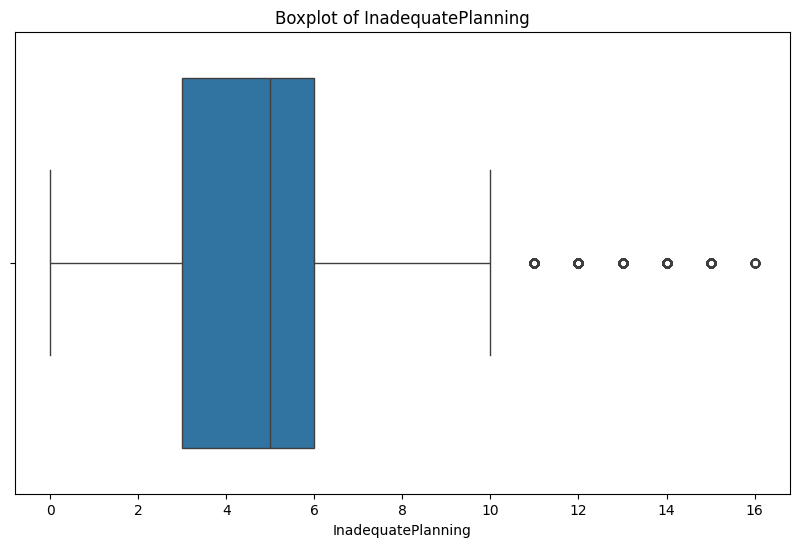

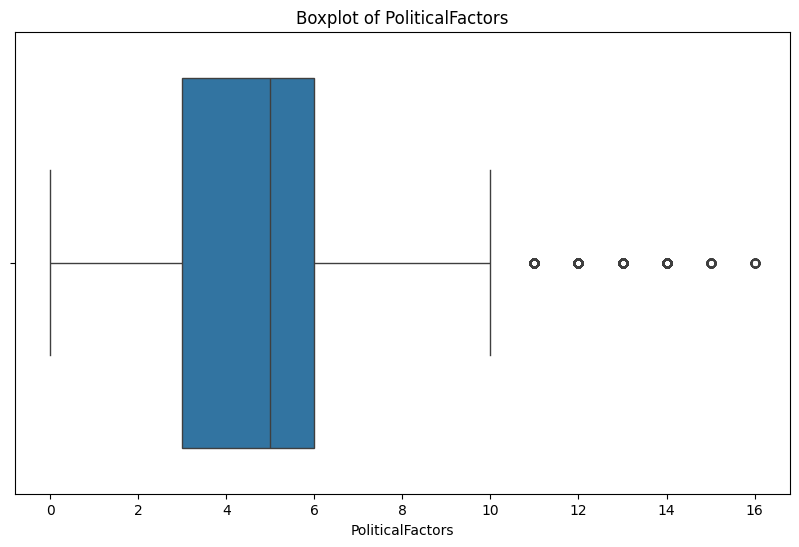

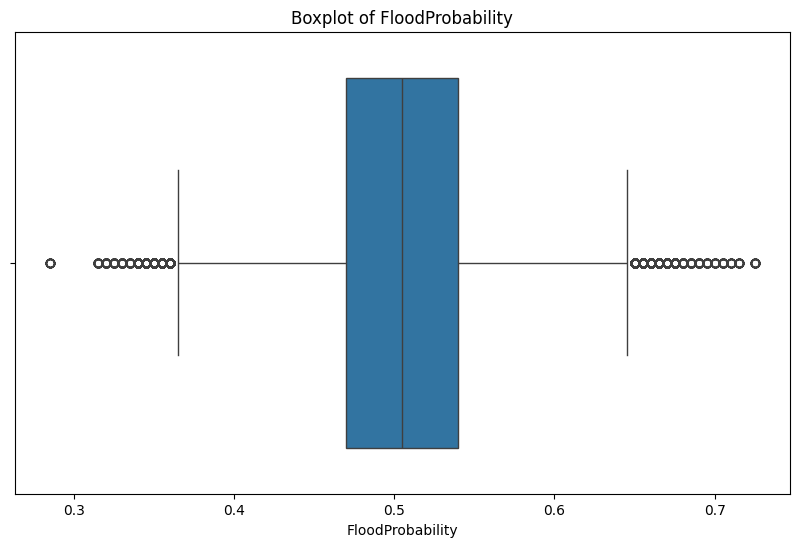

In [12]:
for feature in df_train.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_train[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

In [13]:
# Identifikasi Outliers menggunakan IQR
Q1 = df_train.quantile(0.25)
Q3 = df_train.quantile(0.75)
IQR = Q3 - Q1

# Filter datafrem untuk hanya menyimpan baris yang tidak mengandung outliers pada kolom numerik
condition = ~((df_train < (Q1 - 1.5 * IQR)) |(df_train > (Q3 + 1.5 * IQR))).any(axis=1)
df_train_no_outliers = df_train.loc[condition, df_train.columns]

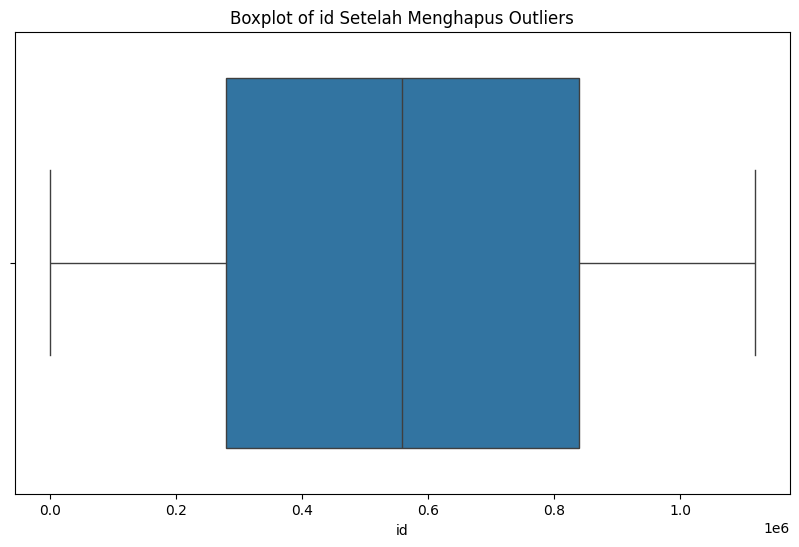

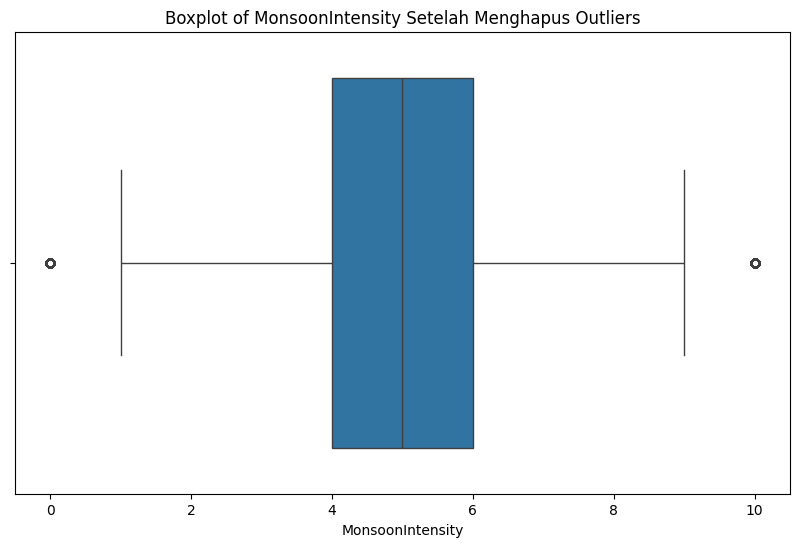

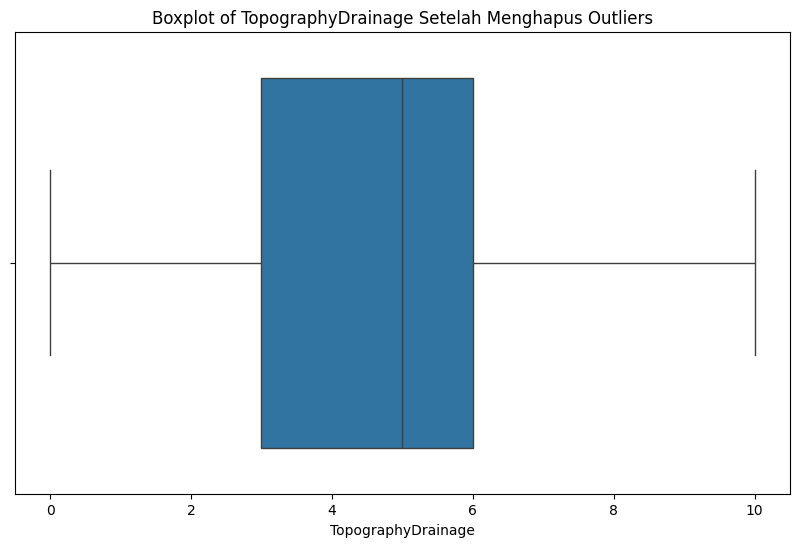

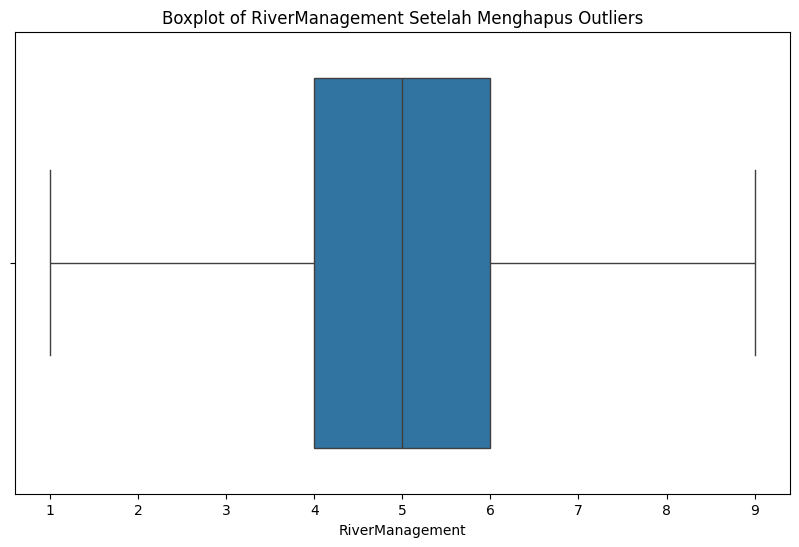

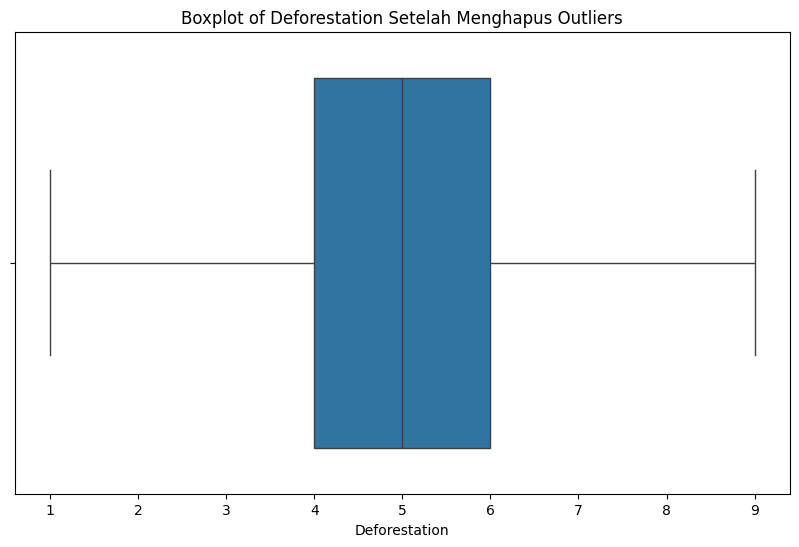

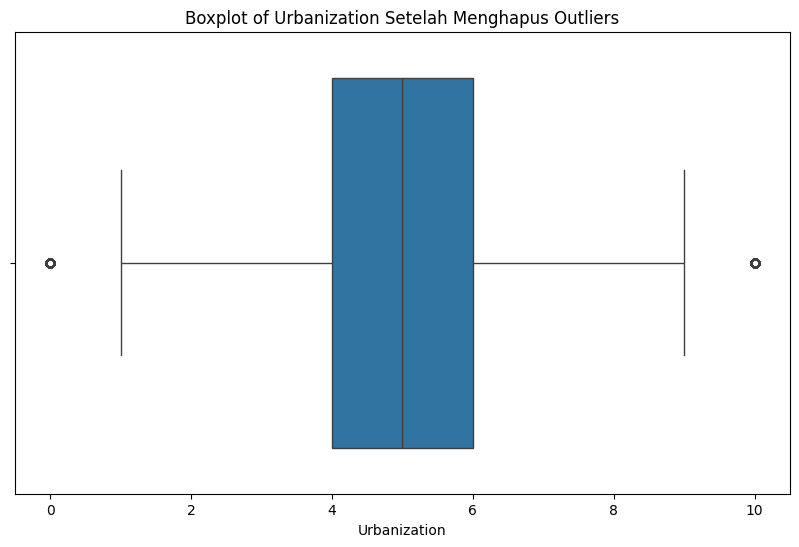

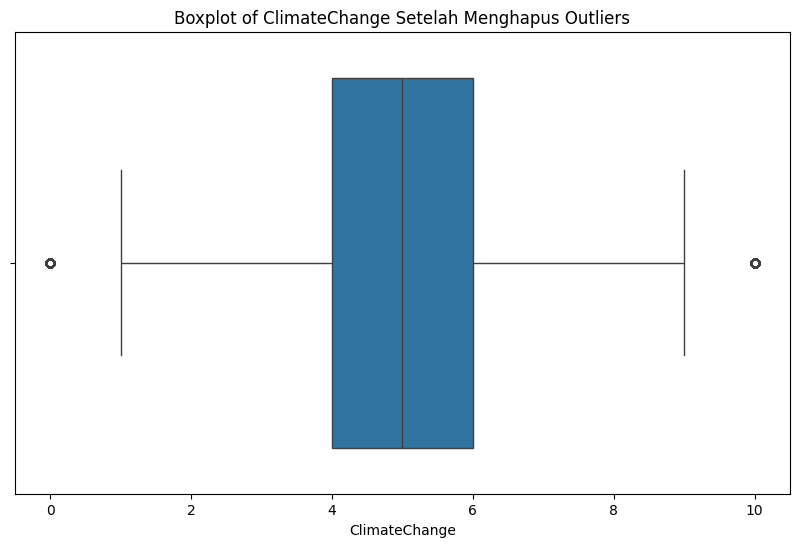

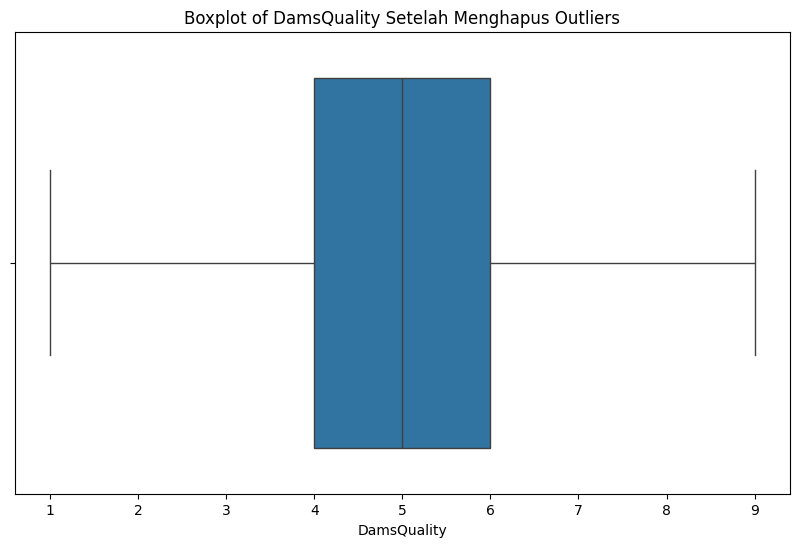

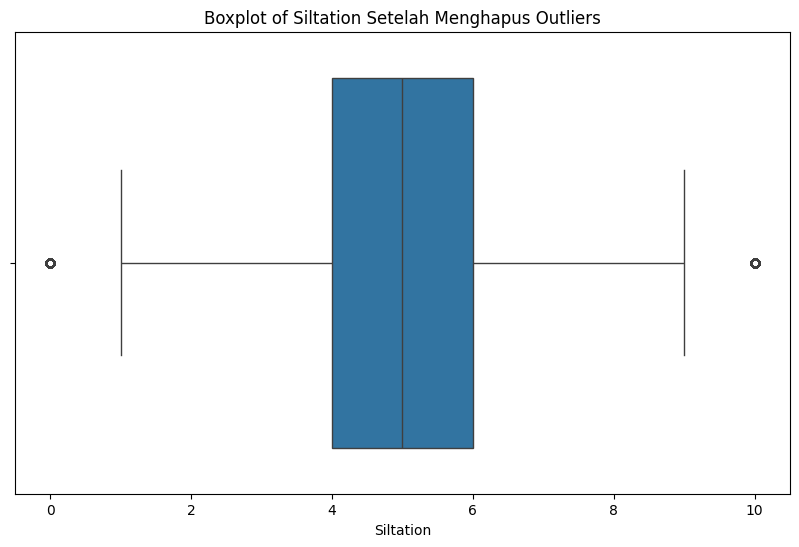

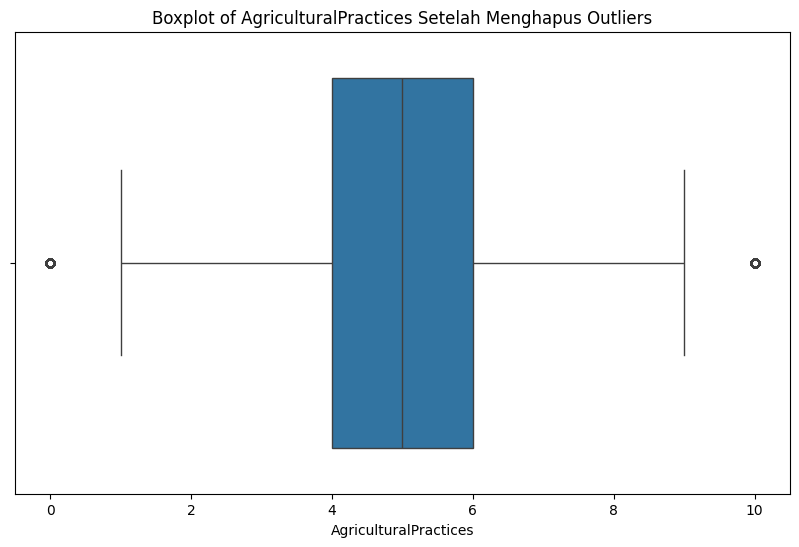

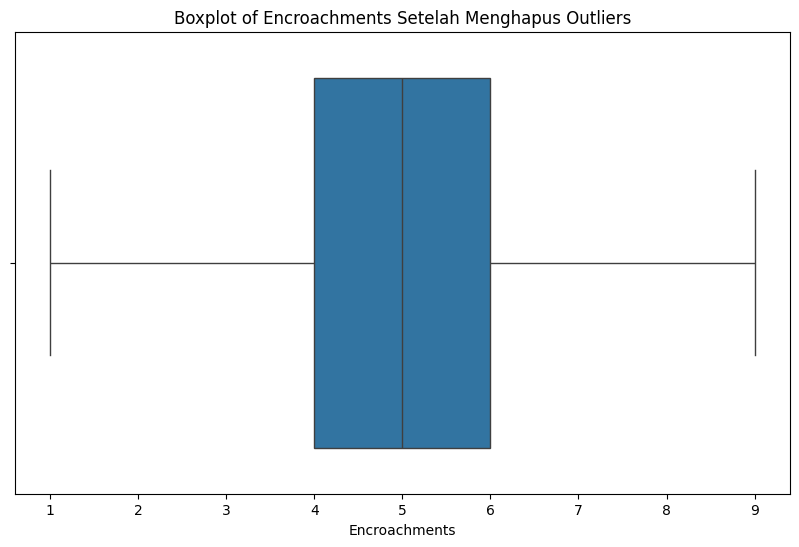

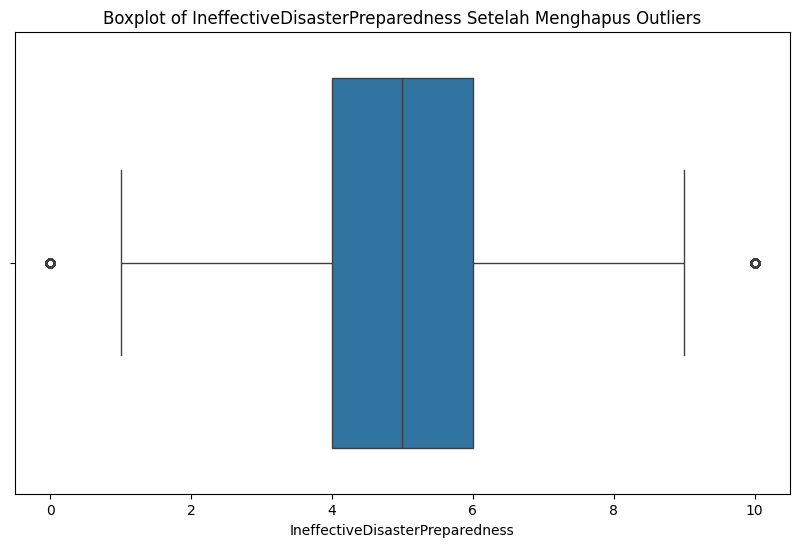

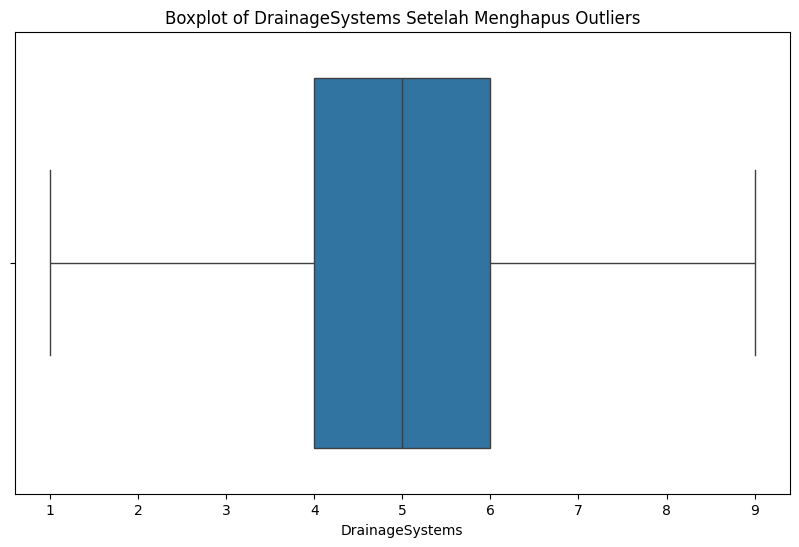

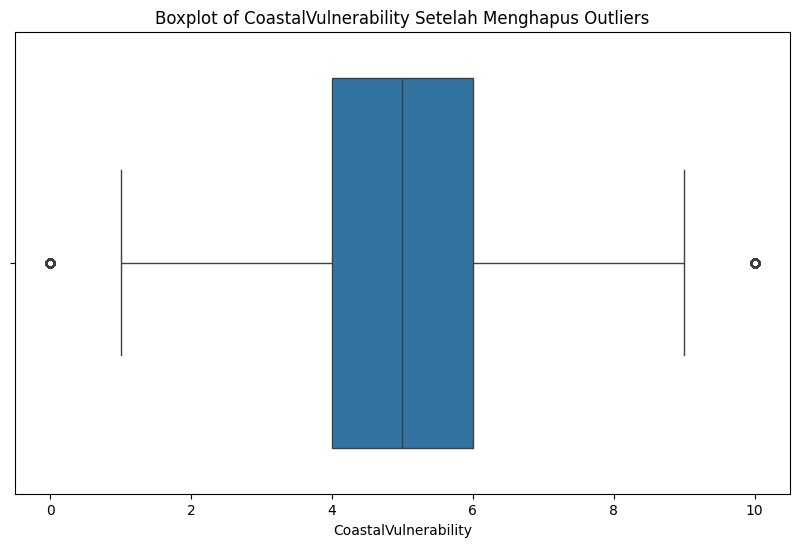

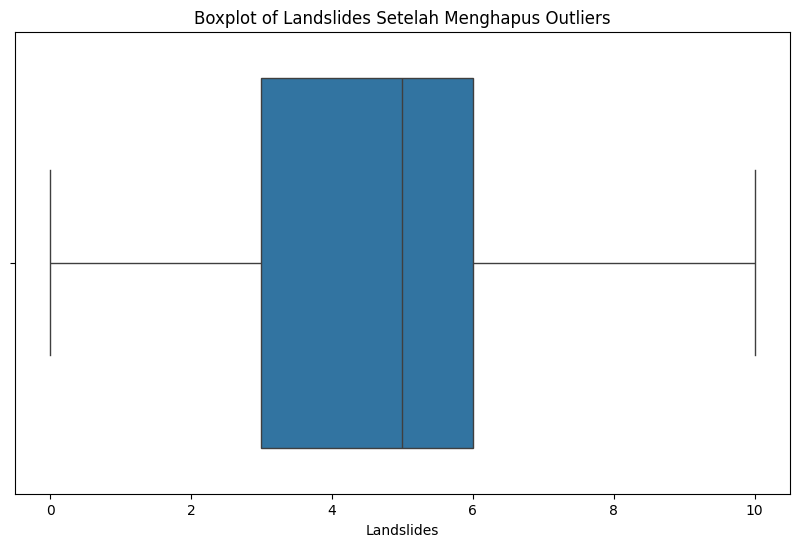

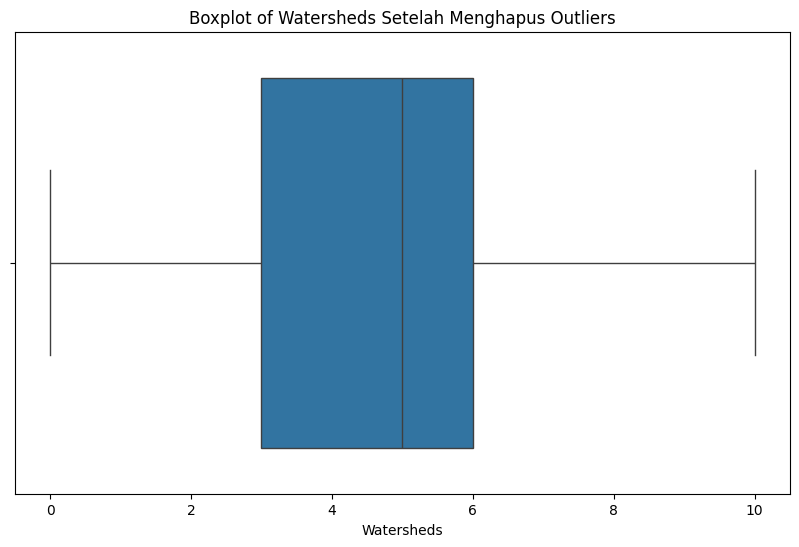

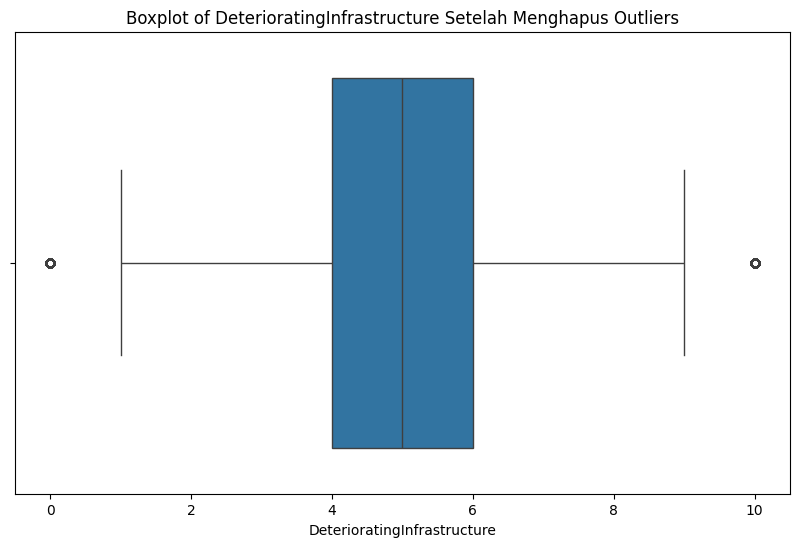

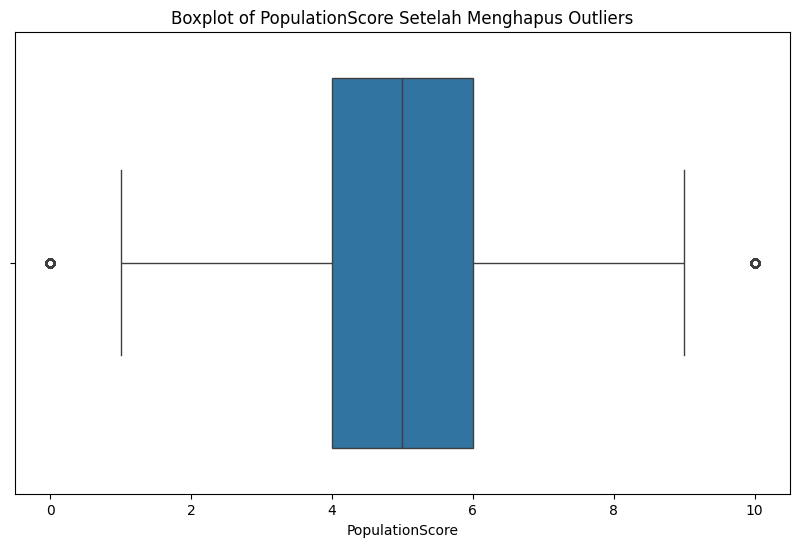

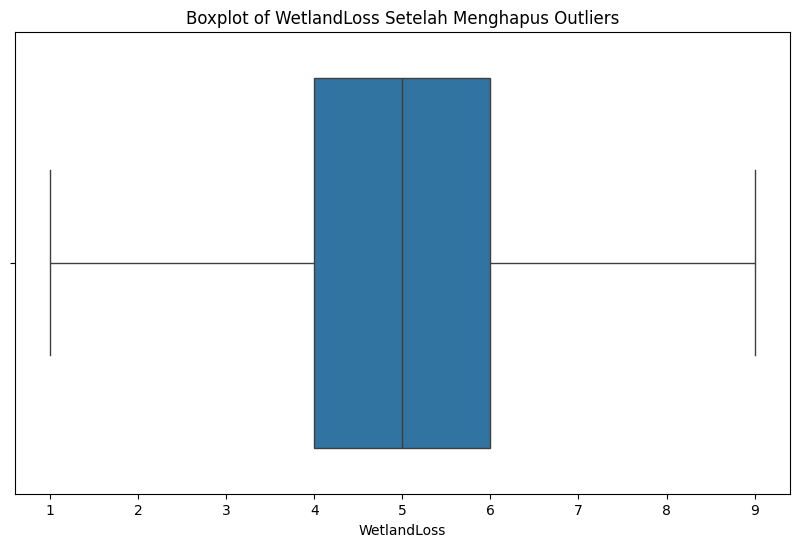

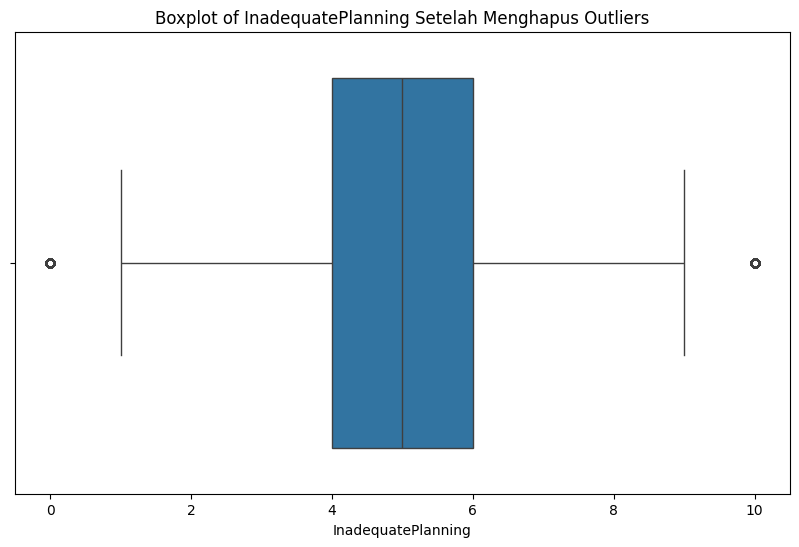

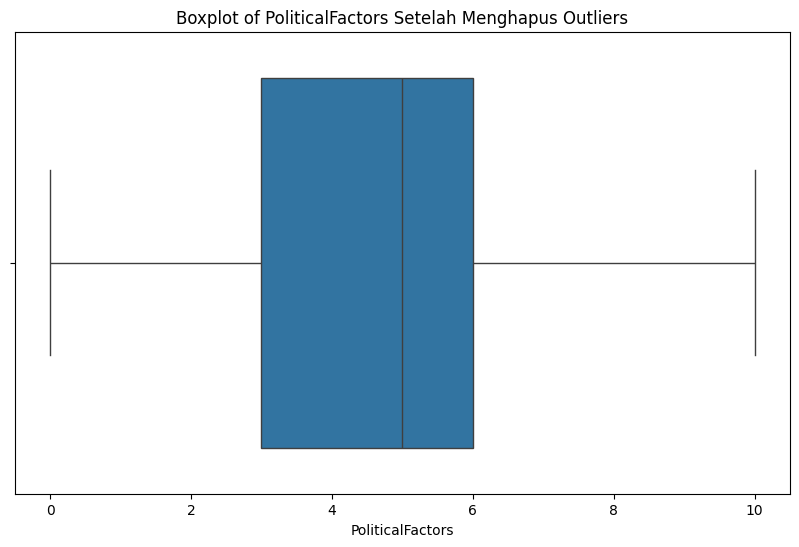

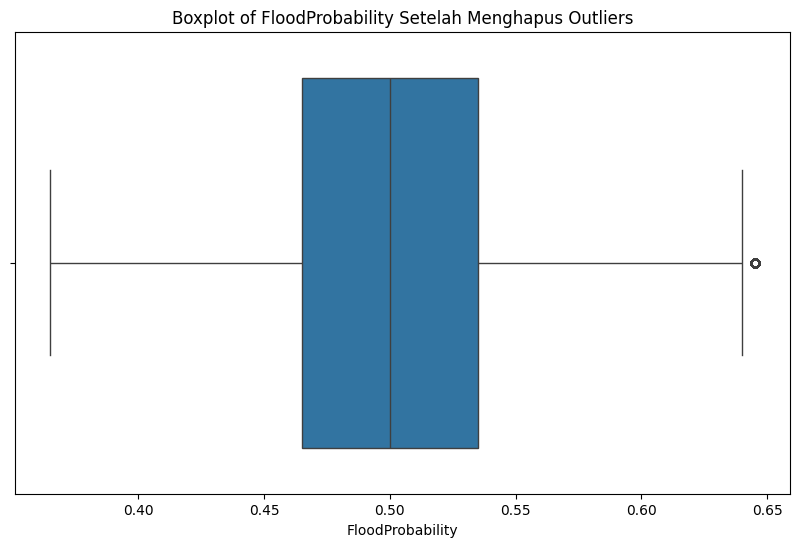

In [14]:
for feature in df_train_no_outliers.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_train_no_outliers[feature])
    plt.title(f'Boxplot of {feature} Setelah Menghapus Outliers')
    plt.show()

## 6. Standarisasi

In [15]:
df_train_no_outliers.describe(include='all')

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,8.458860e+05,845886.000000,845886.000000,845886.000000,845886.000000,845886.000000,845886.000000,845886.000000,845886.000000,845886.000000,...,845886.000000,845886.000000,845886.000000,845886.000000,845886.000000,845886.000000,845886.000000,845886.000000,845886.000000,845886.000000
mean,5.590170e+05,4.886781,4.898836,4.879257,4.869477,4.918204,4.909464,4.874602,4.898940,4.916368,...,4.867065,4.925275,4.905857,4.907002,4.895851,4.898996,4.871593,4.915007,4.912765,0.499878
std,3.227083e+05,1.951982,2.000328,1.878280,1.859699,1.989407,1.963764,1.878236,1.969609,1.976611,...,1.870908,1.989935,1.989511,1.991059,1.969778,1.976919,1.872377,1.988109,1.993880,0.048869
min,0.000000e+00,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.365000
25%,2.794952e+05,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,0.465000
50%,5.590235e+05,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,0.500000
75%,8.385145e+05,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,0.535000
max,1.117956e+06,10.000000,10.000000,9.000000,9.000000,10.000000,10.000000,9.000000,10.000000,10.000000,...,9.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,10.000000,0.645000


In [16]:
# Memastikan hanya data numerik yang distandarisasi
numeric_fetures = df_train_no_outliers.select_dtypes(include=['number']).columns
numeric_fetures

# Standarisasi data numerik
scaler = StandardScaler()
df_train_standardized = df_train_no_outliers.copy()
df_train_standardized[numeric_fetures] = scaler.fit_transform(df_train_no_outliers[numeric_fetures])
df_train_standardized.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,-1.732268,0.058002,1.550328,0.064284,1.683351,0.543778,-0.463123,-0.465651,-0.964121,-0.969523,...,0.071054,-0.967507,-0.957953,0.046708,-0.454798,1.062768,0.068580,1.048732,-0.959319,-1.122956
1,-1.732265,0.570302,1.050410,-0.468118,-0.467537,1.549104,1.573782,-0.998066,0.051310,-0.463606,...,1.140054,-1.470036,-2.465862,-0.957783,0.052873,-0.960584,-0.999582,-0.460240,-0.959319,-1.020641
2,-1.732262,0.570302,0.050574,0.596686,1.145629,-0.964210,1.064556,-2.062896,0.051310,-0.463606,...,1.140054,-0.967507,1.052592,0.046708,0.560545,1.568606,-1.533663,-0.963231,-0.959319,0.616394
3,-1.732259,-0.966598,-0.449345,0.596686,0.070185,-0.461547,1.573782,-0.465651,1.066740,0.548227,...,-1.532446,-0.464978,1.052592,-0.455538,-0.454798,0.556930,0.068580,1.048732,0.043751,0.718708
4,-1.732256,0.058002,-0.949263,-1.532923,0.607907,-0.461547,-0.463123,-0.998066,-0.964121,-0.969523,...,-1.532446,-1.470036,0.549956,0.548954,-0.454798,-1.972260,-1.533663,-0.963231,0.043751,-1.736844


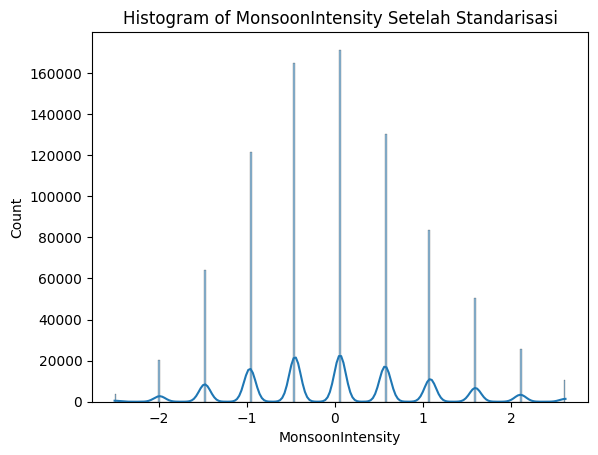

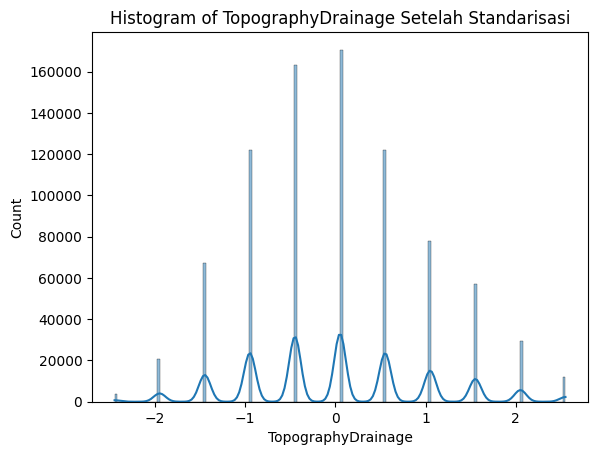

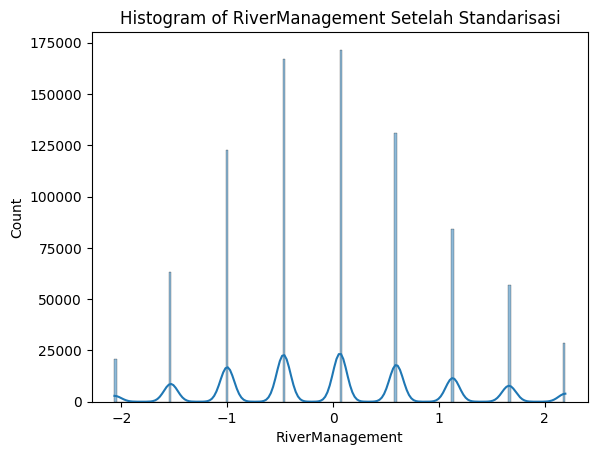

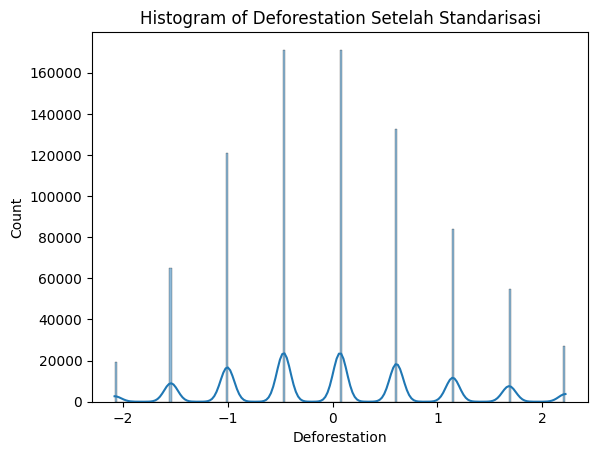

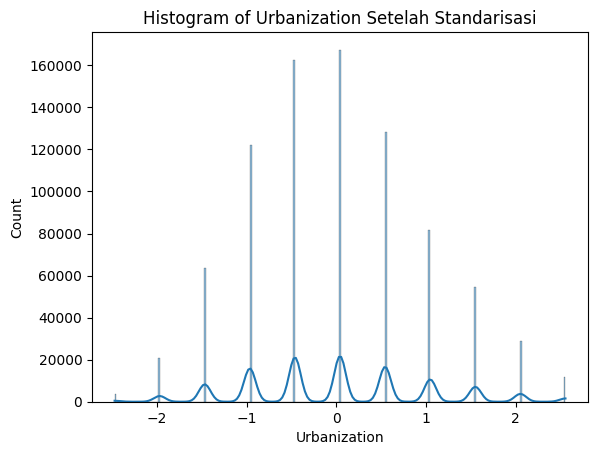

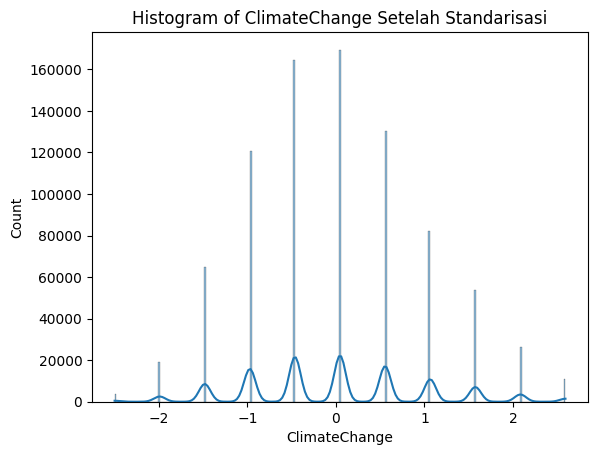

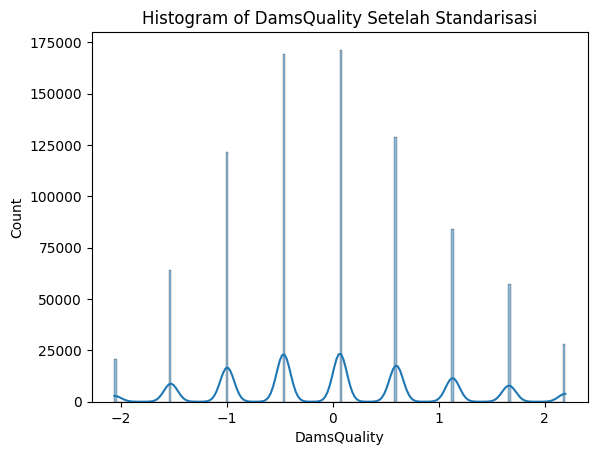

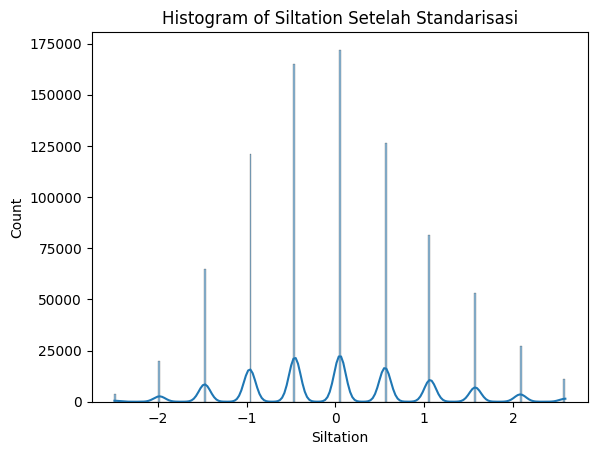

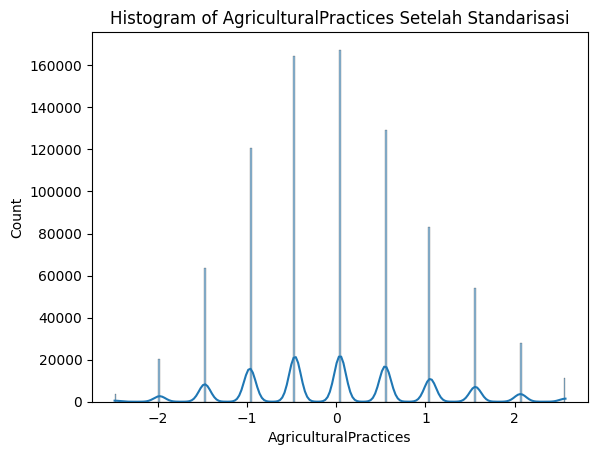

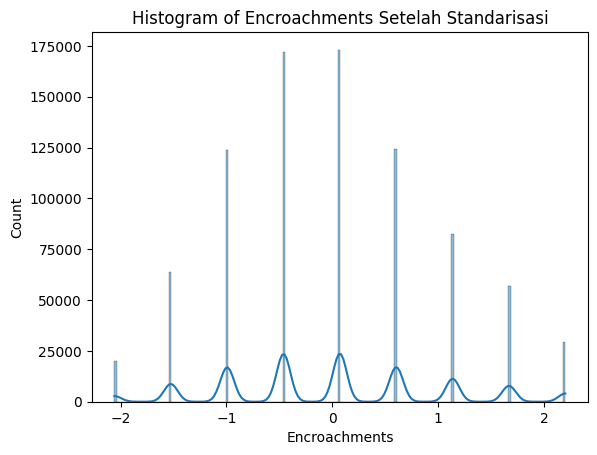

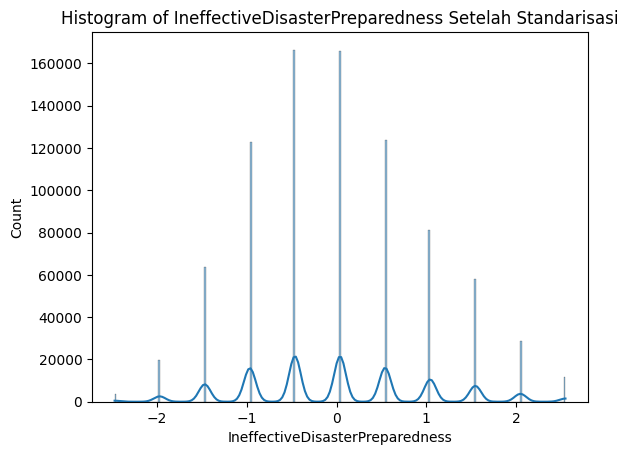

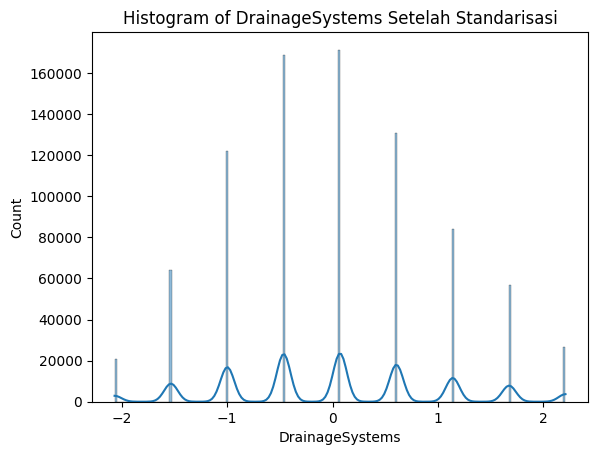

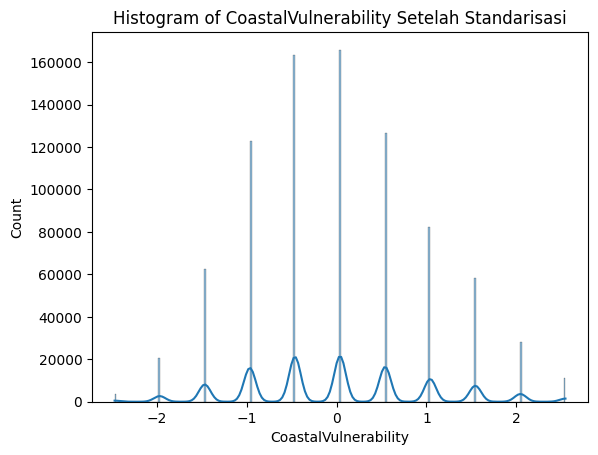

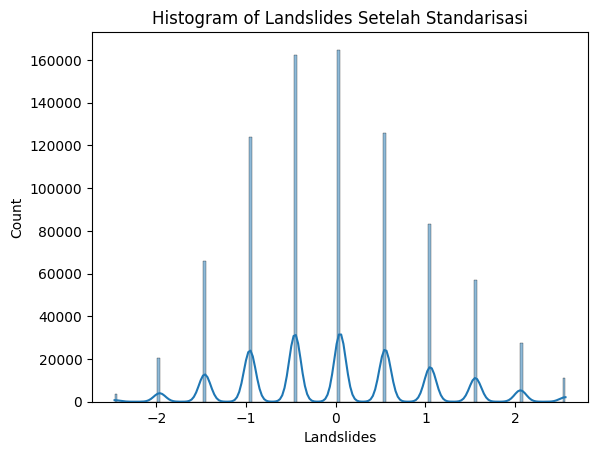

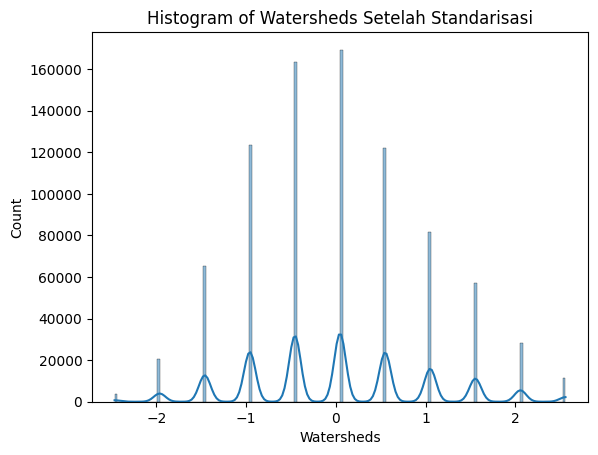

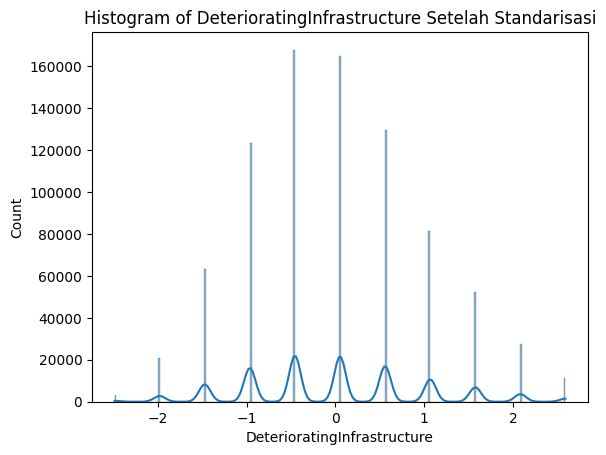

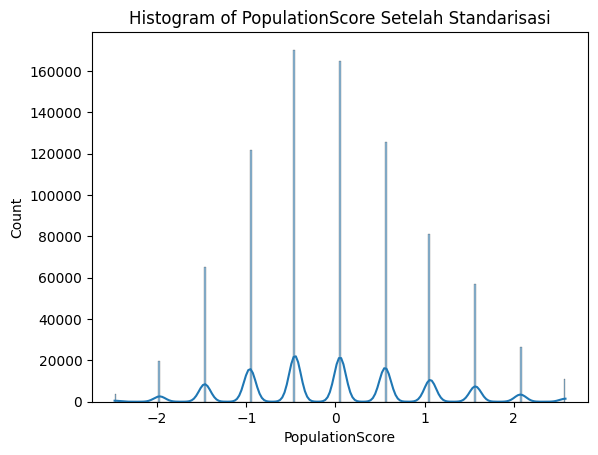

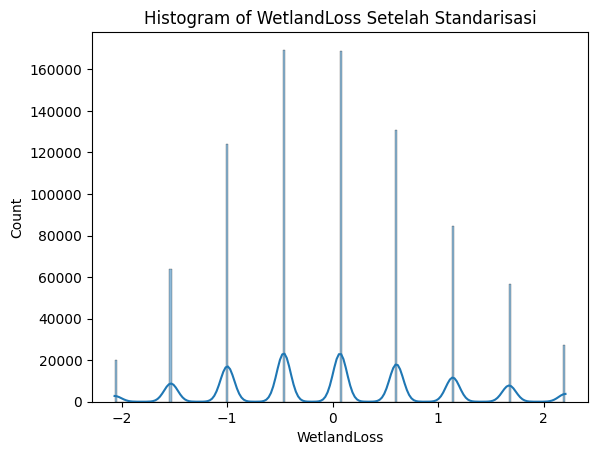

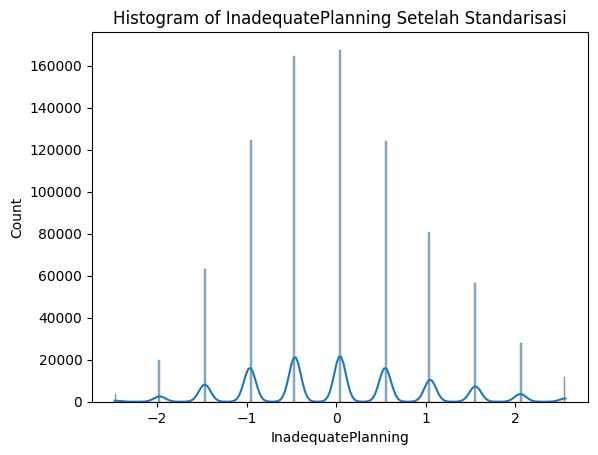

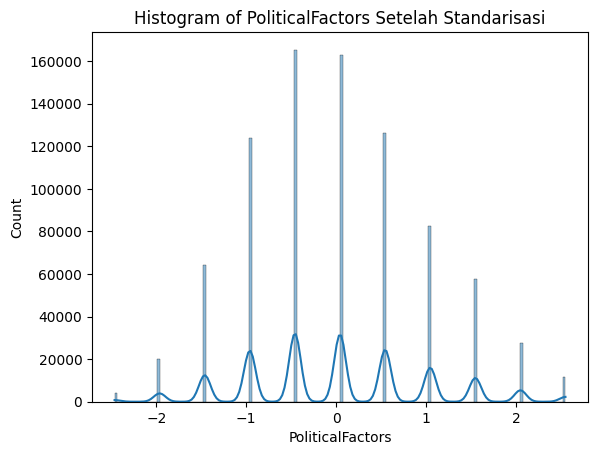

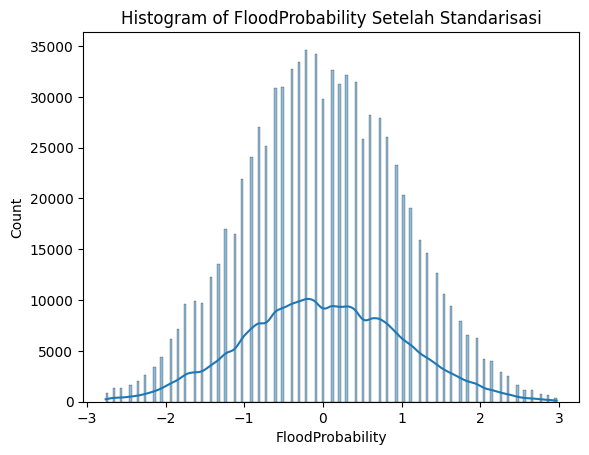

In [17]:
for feature in df_train_standardized.columns.drop('id'):
    sns.histplot(df_train_standardized[feature], kde=True)
    plt.title(f'Histogram of {feature} Setelah Standarisasi')
    plt.show()

## 7. Identifikasi Duplikasi

In [18]:
duplicated_rows = df_train_standardized.duplicated()
duplicated_rows.sum()

np.int64(0)

## 8. EDA & EXDA

In [24]:
df_train_eda = df_train_standardized.copy()
df_train_eda.drop(columns=['id'] , inplace=True)
df_train_eda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 845886 entries, 0 to 1117956
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   MonsoonIntensity                 845886 non-null  float64
 1   TopographyDrainage               845886 non-null  float64
 2   RiverManagement                  845886 non-null  float64
 3   Deforestation                    845886 non-null  float64
 4   Urbanization                     845886 non-null  float64
 5   ClimateChange                    845886 non-null  float64
 6   DamsQuality                      845886 non-null  float64
 7   Siltation                        845886 non-null  float64
 8   AgriculturalPractices            845886 non-null  float64
 9   Encroachments                    845886 non-null  float64
 10  IneffectiveDisasterPreparedness  845886 non-null  float64
 11  DrainageSystems                  845886 non-null  float64
 12  Coasta

In [25]:
df_train_eda.describe(include='all')

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,...,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05
mean,-1.839932e-16,-3.870712e-17,-1.656476e-16,-1.122910e-16,-2.378875e-17,1.193469e-16,1.690748e-16,-1.169278e-17,1.209597e-16,-1.608765e-16,...,-5.177749e-17,-1.122238e-16,-2.022716e-16,-1.614141e-16,-2.247667e-16,9.313900e-17,1.630269e-16,1.419261e-16,-5.342389e-17,-6.361811e-16
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-2.503498e+00,-2.449018e+00,-2.065325e+00,-2.080702e+00,-2.472198e+00,-2.500029e+00,-2.062896e+00,-2.487267e+00,-2.487272e+00,-2.057707e+00,...,-2.066946e+00,-2.475094e+00,-2.465862e+00,-2.464520e+00,-2.485485e+00,-2.478098e+00,-2.067744e+00,-2.472204e+00,-2.463924e+00,-2.759991e+00
25%,-4.542981e-01,-9.492630e-01,-4.681183e-01,-4.675365e-01,-4.615469e-01,-4.631232e-01,-4.656514e-01,-4.564057e-01,-4.636059e-01,-4.613276e-01,...,-4.634462e-01,-4.649776e-01,-9.579532e-01,-9.577833e-01,-4.547982e-01,-4.547462e-01,-4.655010e-01,-4.602404e-01,-9.593186e-01,-7.136972e-01
50%,5.800187e-02,5.057361e-02,6.428396e-02,7.018534e-02,4.111574e-02,4.610324e-02,6.676350e-02,5.130956e-02,4.231074e-02,7.079869e-02,...,7.105385e-02,3.755159e-02,4.731955e-02,4.670802e-02,5.287338e-02,5.109174e-02,6.857993e-02,4.275047e-02,4.375149e-02,2.505596e-03
75%,5.703019e-01,5.504919e-01,5.966862e-01,6.079072e-01,5.437784e-01,5.553296e-01,5.991784e-01,5.590249e-01,5.482274e-01,6.029250e-01,...,6.055539e-01,5.400808e-01,5.499559e-01,5.489537e-01,5.605450e-01,5.569297e-01,6.026608e-01,5.457413e-01,5.452865e-01,7.187084e-01
max,2.619502e+00,2.550165e+00,2.193893e+00,2.221073e+00,2.554429e+00,2.592235e+00,2.196423e+00,2.589886e+00,2.571894e+00,2.199304e+00,...,2.209054e+00,2.550197e+00,2.560501e+00,2.557936e+00,2.591231e+00,2.580282e+00,2.204904e+00,2.557705e+00,2.551427e+00,2.969631e+00


In [26]:
# menghitung jumlah variabel
num_vars = df_train_eda.shape[1]

print(f'Jumlah variabel dalam dataset: {num_vars}')

Jumlah variabel dalam dataset: 21


In [27]:
# menentukan jumlah baris dan kolom untuk grid subplot
n_cols = 4 # jumlah kolom yang diinginkan
n_rows = (num_vars + n_cols - 1) // n_cols # menghitung jumlah baris yang dibutuhkan

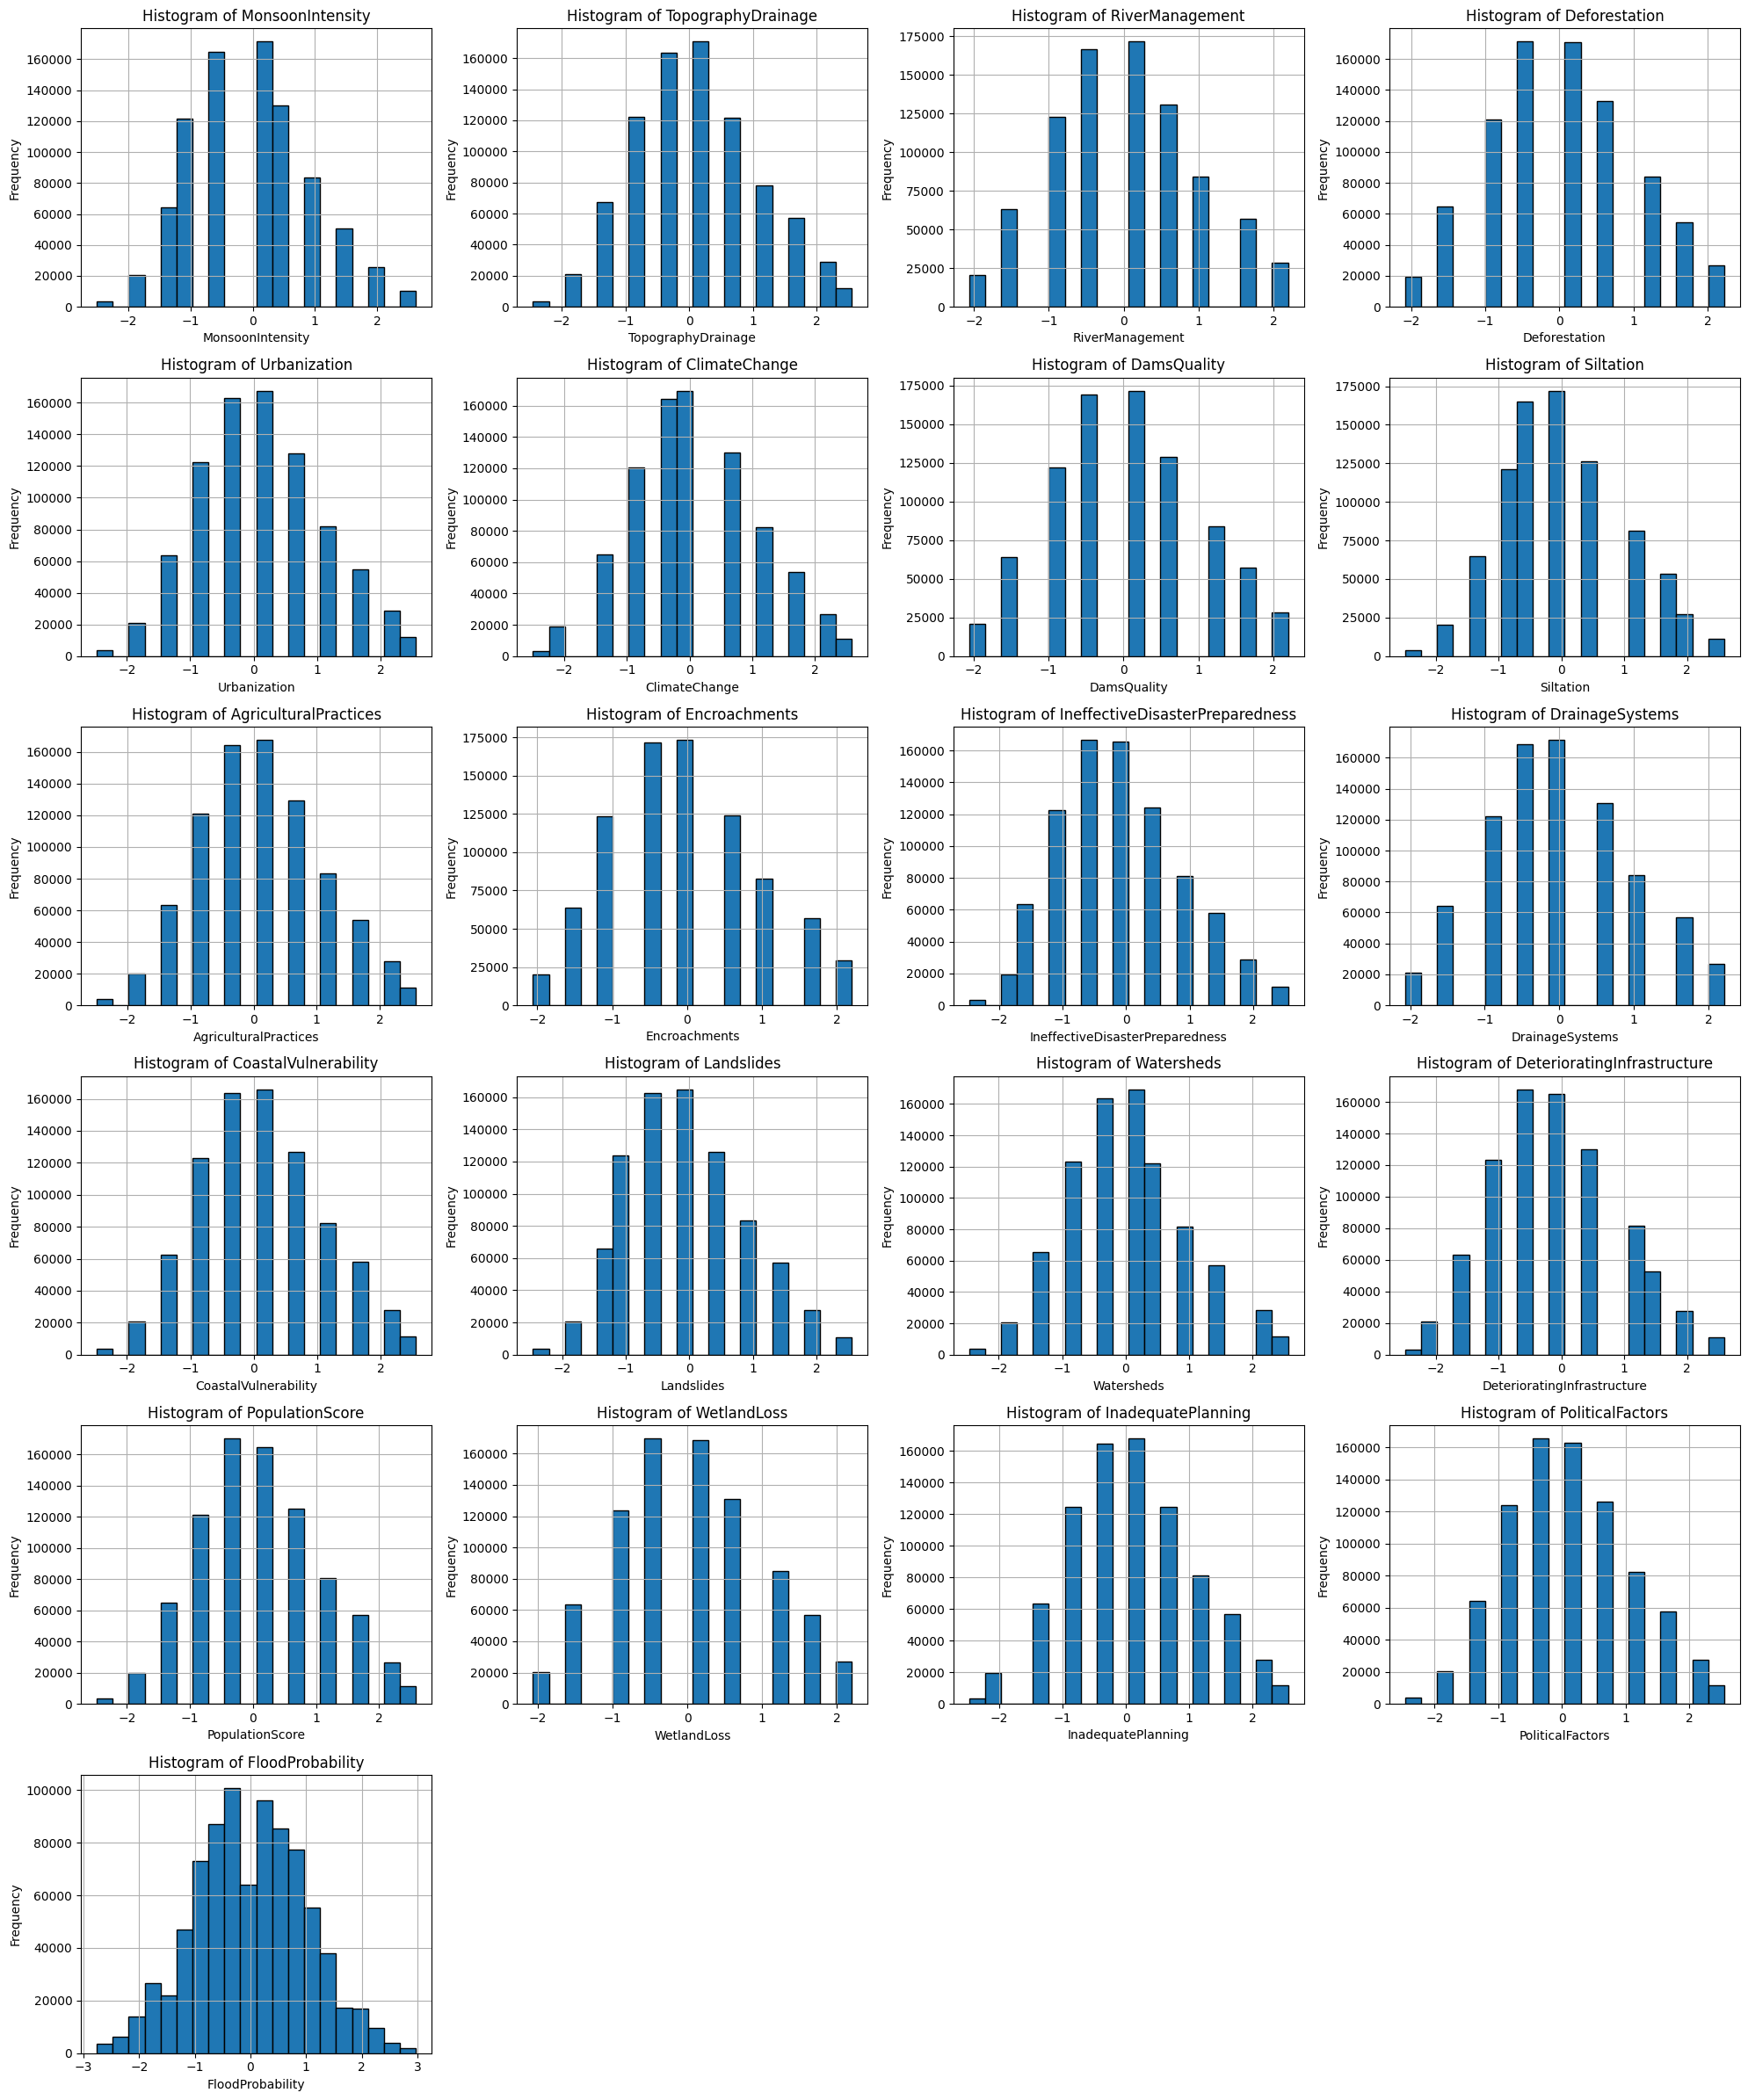

In [28]:
# membuat subplot untuk histogram setiap variabel
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))

# Flatten axes untuk memudahkan iterasi
axes = axes.flatten()

# plot histogram untuk setiap variabel
for i, feature in enumerate(df_train_eda.columns):
    df_train_eda[feature].hist(ax=axes[i], bins=20, edgecolor='black')
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Menghapus subplot yang tidak terpakai
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Menyesuaikan layout
plt.tight_layout()
plt.show()

#### Matriks Korelasi

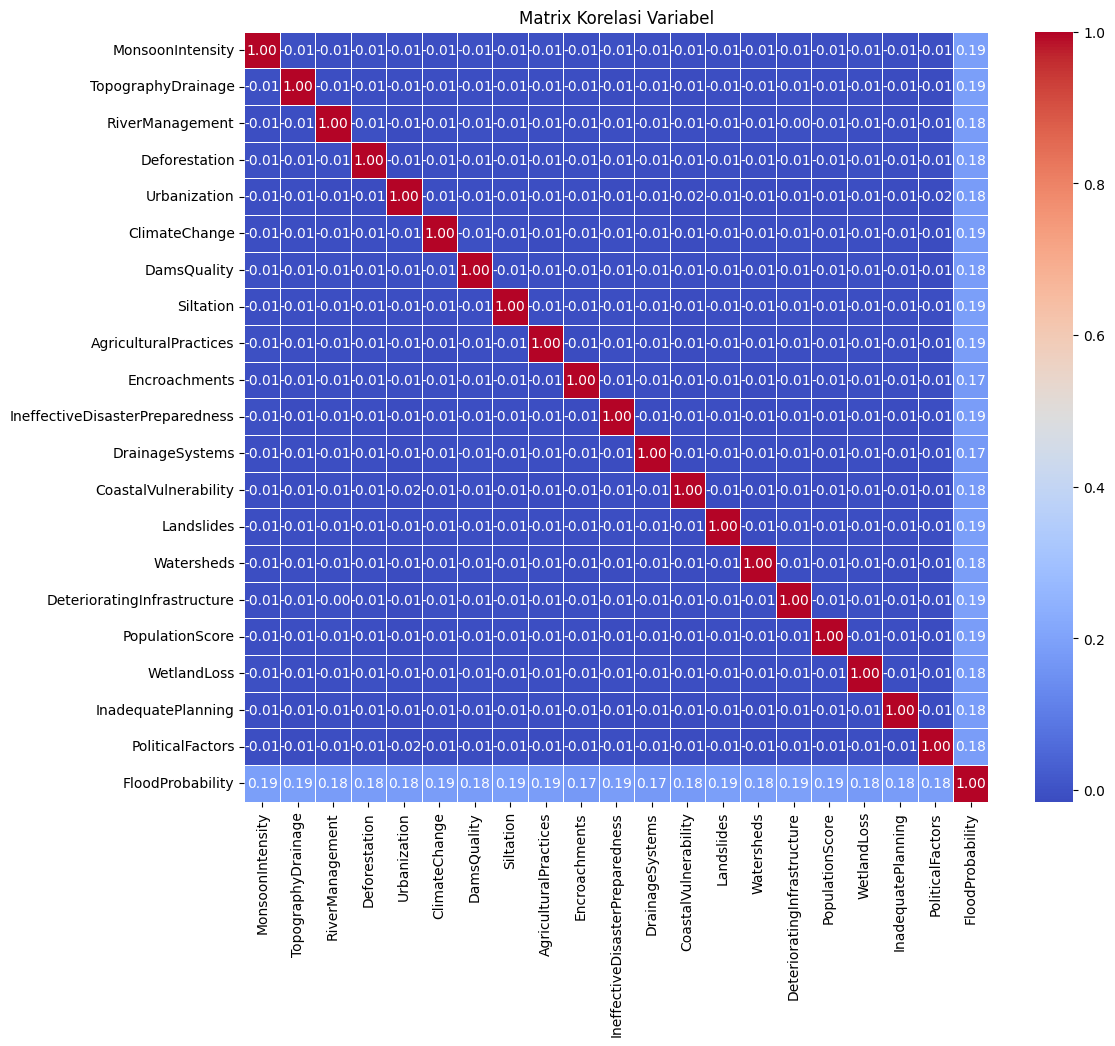

In [31]:
# Heatmap korelasi
plt.figure(figsize=(12, 10))
correlation_matrix = df_train_eda.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Matrix Korelasi Variabel')
plt.show()

#### Pair Plot

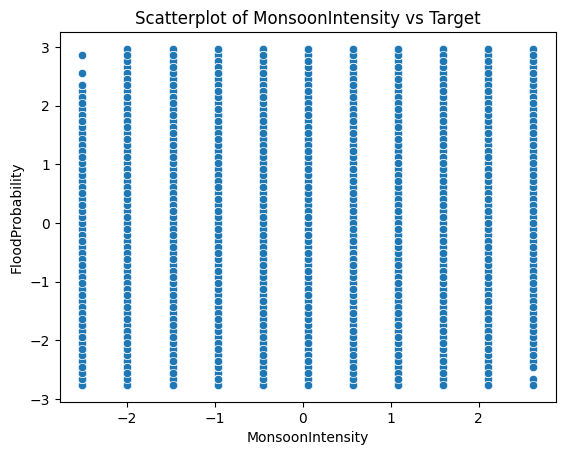

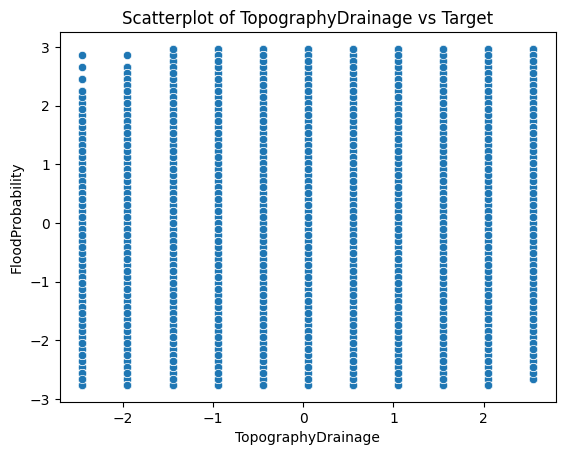

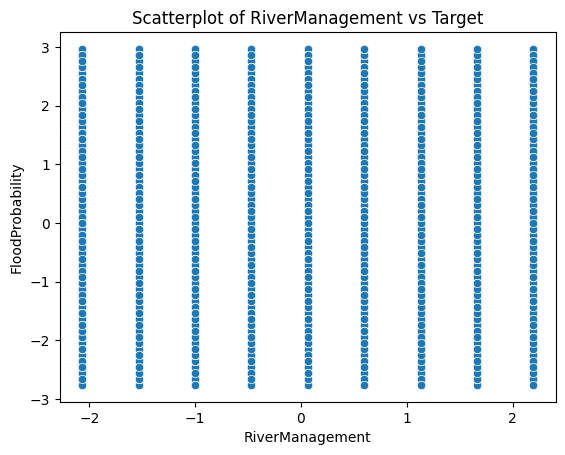

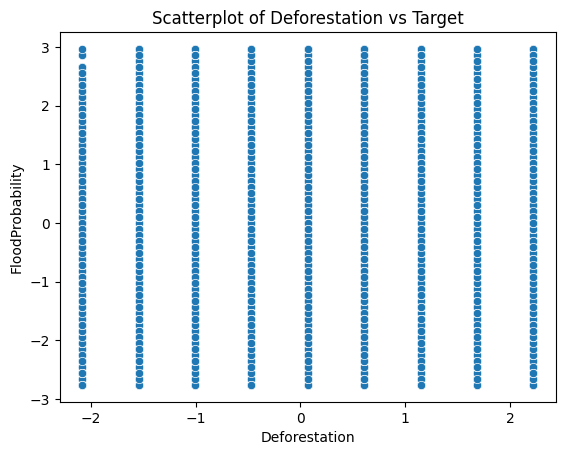

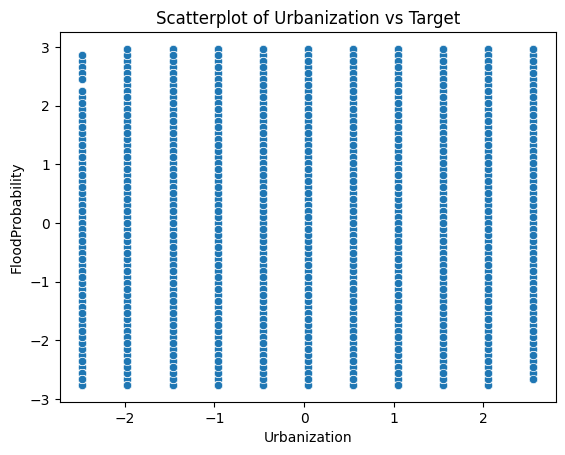

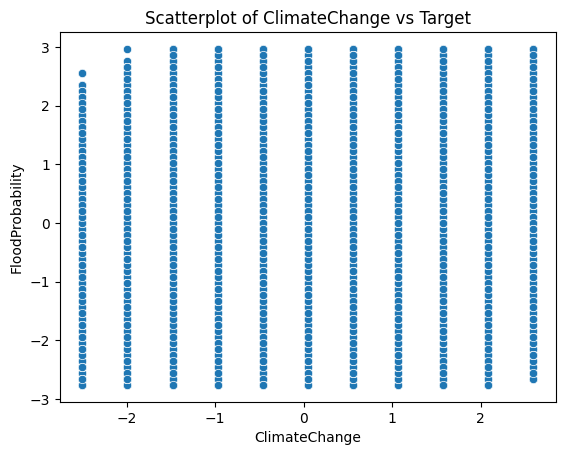

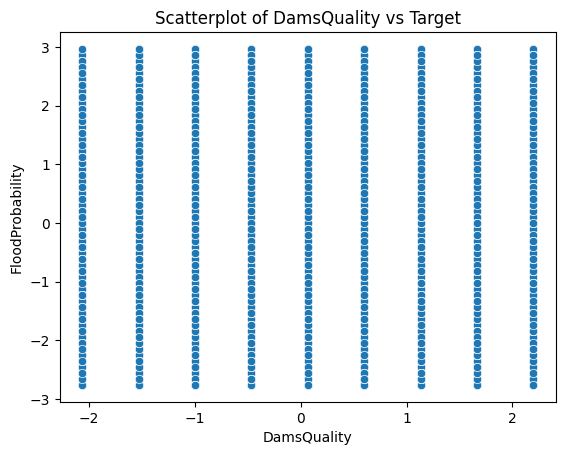

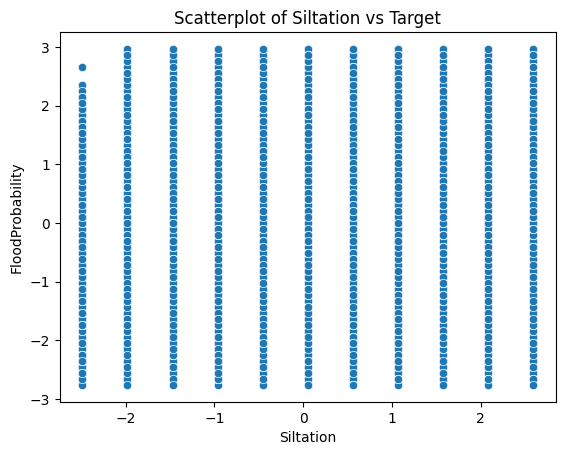

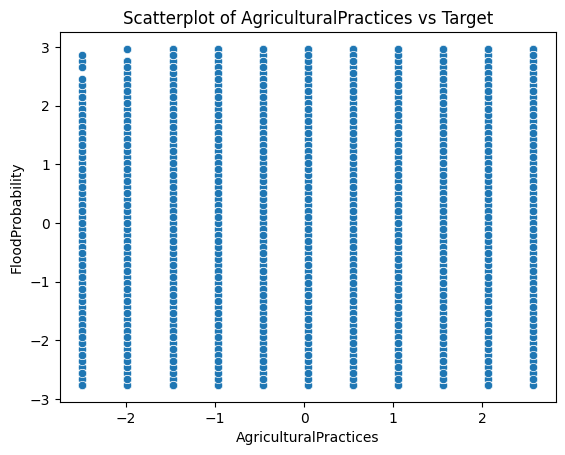

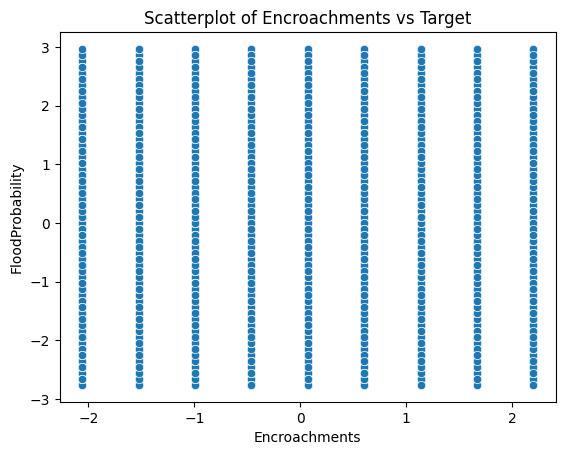

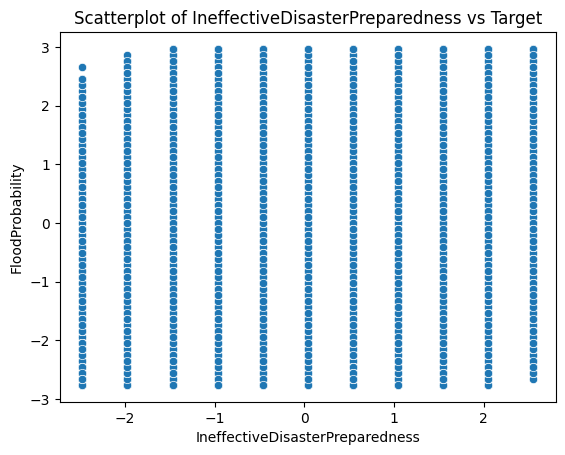

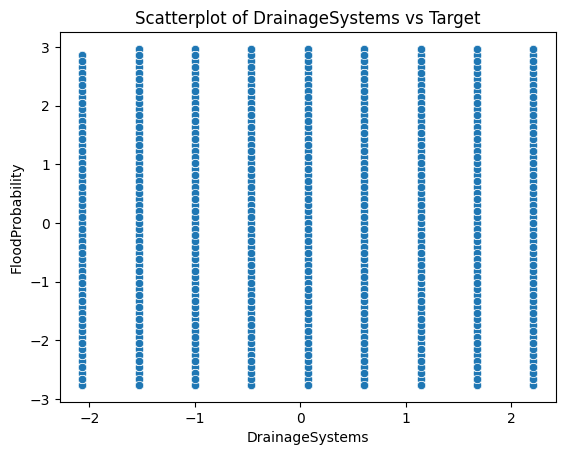

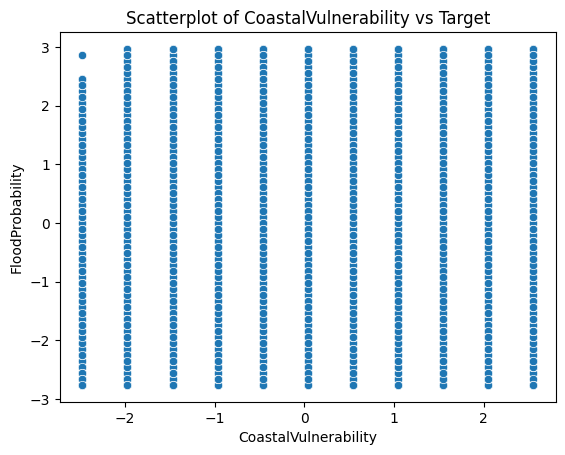

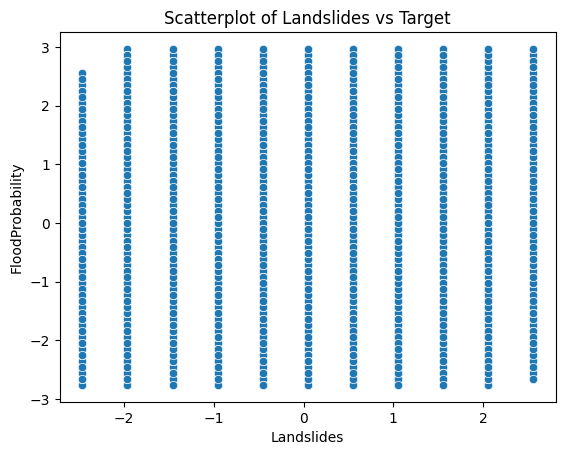

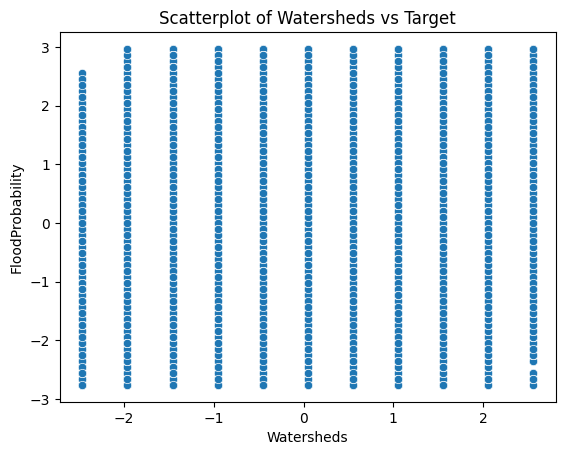

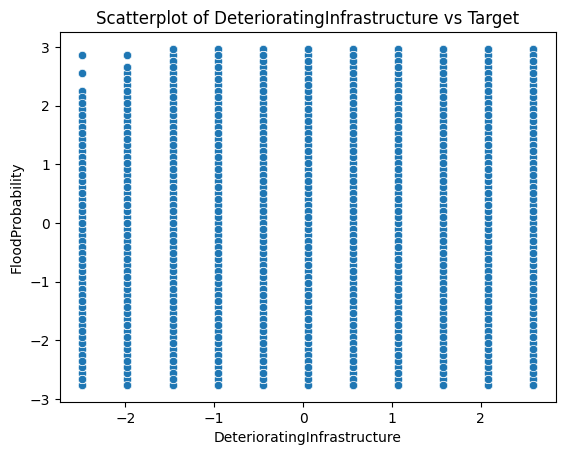

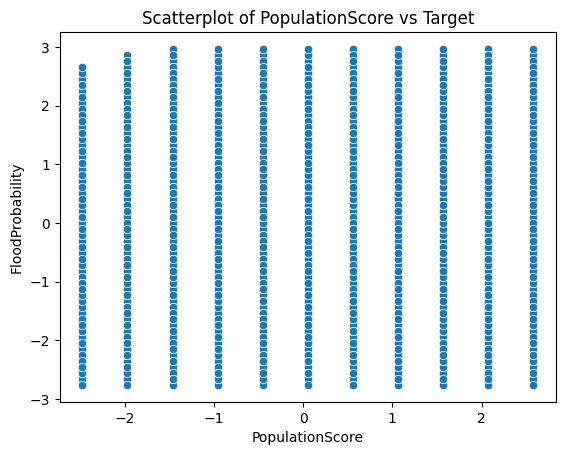

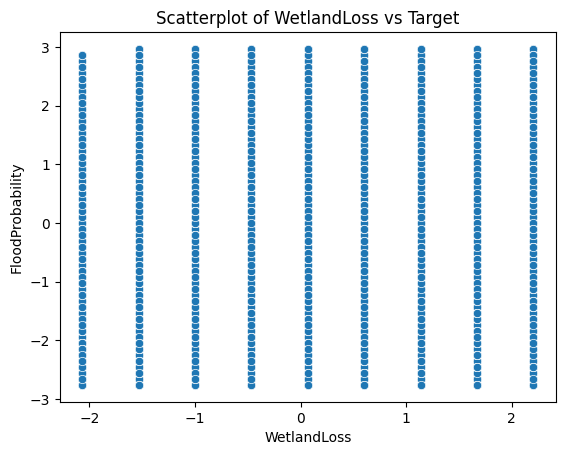

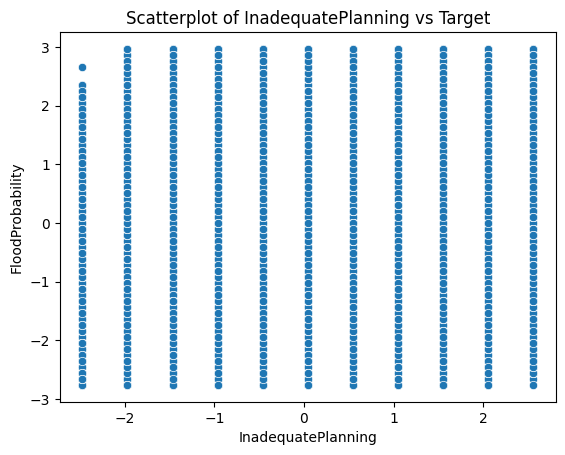

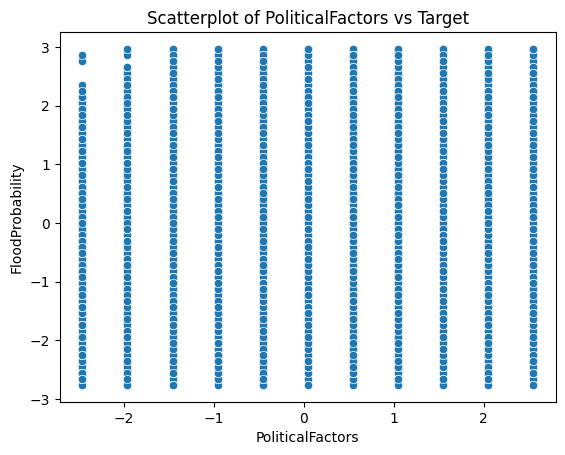

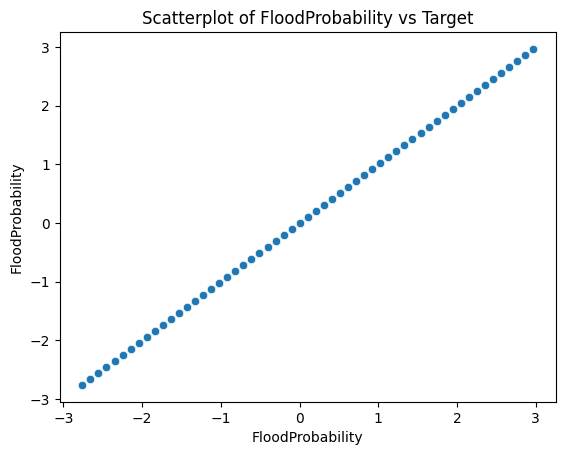

In [41]:
for feature in df_train_eda.columns:
    sns.scatterplot(x=df_train_eda[feature], y=df_train_eda['FloodProbability'])
    plt.title(f'Scatterplot of {feature} vs Target')
    plt.show()

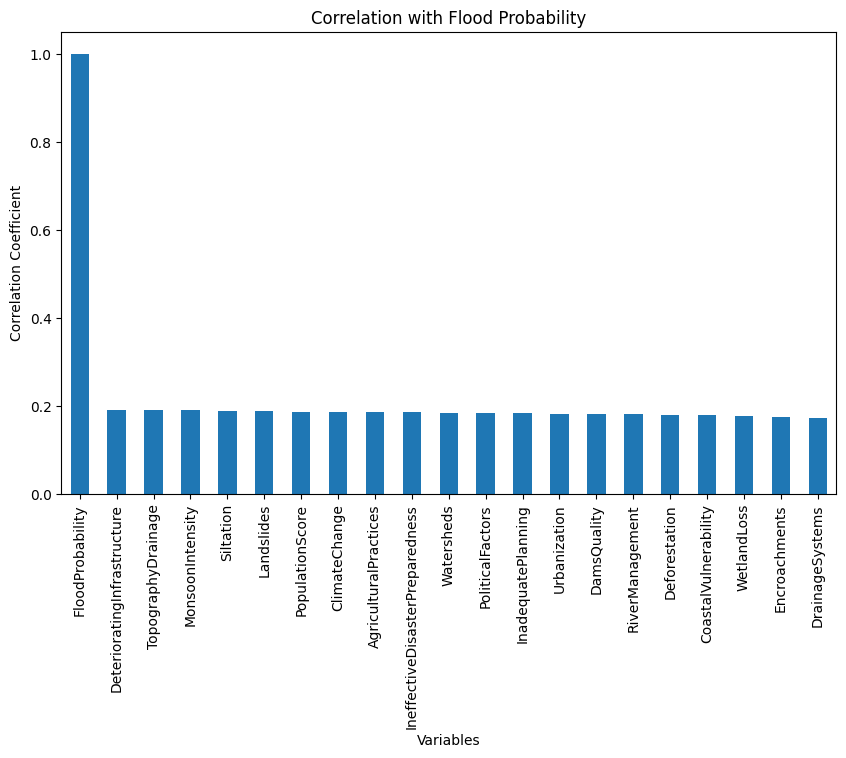

In [42]:
# Menghitung korelasi antara variabel target dan semua variabel lainnya
target_corr = df_train_eda.corr()['FloodProbability']
 
# (Opsional) Mengurutkan hasil korelasi berdasarkan kekuatan korelasi
target_corr_sorted = target_corr.abs().sort_values(ascending=False)
 
plt.figure(figsize=(10, 6))
target_corr_sorted.plot(kind='bar')
plt.title(f'Correlation with Flood Probability')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.show()

# 9. Data Splitting

In [45]:
# Memisahkan fitur dan target
X = df_train_eda.drop(columns=['FloodProbability']) # fitur
y = df_train_eda['FloodProbability'] # target

In [46]:
from sklearn.model_selection import train_test_split

# membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# menghitung panjang/jumlah data latih dan data uji
print("JUmlah data:", len(X))
# menghitung panjang/jumlah data pada x_train dan x_test
print("Data latih:", len(X_train))
print("Data uji:", len(X_test))

JUmlah data: 845886
Data latih: 676708
Data uji: 169178


# 10. Modelling

### 10.1 LARS

In [47]:
from sklearn import linear_model
lars = linear_model.Lars(n_nonzero_coefs=5)
lars.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto false, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"verbose verbose: bool or int, default=FalseSets the verbosity amount.",False
,"precompute precompute: bool, 'auto' or array-like , default='auto'Whether to use a precomputed Gram matrix to speed upcalculations. If set to ``'auto'`` let us decide. The Grammatrix can also be passed as argument.",'auto'
,"n_nonzero_coefs n_nonzero_coefs: int, default=500Target number of non-zero coefficients. Use ``np.inf`` for no limit.",5
,"eps eps: float, default=np.finfo(float).epsThe machine-precision regularization in the computation of theCholesky diagonal factors. Increase this for very ill-conditionedsystems. Unlike the ``tol`` parameter in some iterativeoptimization-based algorithms, this parameter does not controlthe tolerance of the optimization.",np.float64(2....049250313e-16)
,"copy_X copy_X: bool, default=TrueIf ``True``, X will be copied; else, it may be overwritten.",True
,"fit_path fit_path: bool, default=TrueIf True the full path is stored in the ``coef_path_`` attribute.If you compute the solution for a large problem or many targets,setting ``fit_path`` to ``False`` will lead to a speedup, especiallywith a small alpha.",True
,"jitter jitter: float, default=NoneUpper bound on a uniform noise parameter to be added to the`y` values, to satisfy the model's assumption ofone-at-a-time computations. Might help with stability... versionadded:: 0.23",None
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for jittering. Pass an intfor reproducible output across multiple function calls.See :term:`Glossary `. Ignored if `jitter` is None... versionadded:: 0.23",None


In [48]:
pred_lars = lars.predict(X_test)

Cek dan Evaluasi Model

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae_lars = mean_absolute_error(y_test, pred_lars)
mse_lars = mean_squared_error(y_test, pred_lars)
r2_lars = r2_score(y_test, pred_lars)

print(f'MAE LARS: {mae_lars}')
print(f'MSE LARS: {mse_lars}')
print(f'R2 LARS: {r2_lars}')

MAE LARS: 0.8048334280538859
MSE LARS: 0.9935476206775183
R2 LARS: 0.005466454714580626


In [54]:
# Membuat dictuionary untuk menyimpan hasil
data = {
    'Model': ['LARS'],
    'MAE': [mae_lars],
    'MSE': [mse_lars],
    'R2': [r2_lars]
}

# Konversi dictionary ke DataFrame
results_df = pd.DataFrame(data, index=['1'])
results_df

,Model,MAE,MSE,R2
1,LARS,0.804833,0.993548,0.005466


### 10.2. Linear Regression

In [55]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [56]:
pred_LR = LR.predict(X_test)

#### Cek Evaluasi Model

In [57]:
mae_LR = mean_absolute_error(y_test, pred_LR)
mse_LR = mean_squared_error(y_test, pred_LR)
r2_LR = r2_score(y_test, pred_LR)

print(f'MAE LR: {mae_LR}')
print(f'MSE LR: {mse_LR}')
print(f'R2 LR: {r2_LR}')

MAE LR: 0.3291416529981247
MSE LR: 0.1712951124823056
R2 LR: 0.8285349066701791


In [59]:
results_df.loc['2'] = ['Linear Regression', mae_LR, mse_LR, r2_LR]
results_df

,Model,MAE,MSE,R2
1,LARS,0.804833,0.993548,0.005466
2,Linear Regression,0.329142,0.171295,0.828535


### 10.3 GradientBoostingRegressor

In [60]:
from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor(random_state=184)
GBR.fit(X_train, y_train)

,"loss loss: {'squared_error', 'absolute_error', 'huber', 'quantile'}, default='squared_error'Loss function to be optimized. 'squared_error' refers to the squarederror for regression. 'absolute_error' refers to the absolute error ofregression and is a robust loss function. 'huber' is acombination of the two. 'quantile' allows quantile regression (use`alpha` to specify the quantile).See:ref:`sphx_glr_auto_examples_ensemble_plot_gradient_boosting_quantile.py`for an example that demonstrates quantile regression for creatingprediction intervals with `loss='quantile'`.",'squared_error'
,"learning_rate learning_rate: float, default=0.1Learning rate shrinks the contribution of each tree by `learning_rate`.There is a trade-off between learning_rate and n_estimators.Values must be in the range `[0.0, inf)`.",0.1
,"n_estimators n_estimators: int, default=100The number of boosting stages to perform. Gradient boostingis fairly robust to over-fitting so a large number usuallyresults in better performance.Values must be in the range `[1, inf)`.",100
,"subsample subsample: float, default=1.0The fraction of samples to be used for fitting the individual baselearners. If smaller than 1.0 this results in Stochastic GradientBoosting. `subsample` interacts with the parameter `n_estimators`.Choosing `subsample < 1.0` leads to a reduction of varianceand an increase in bias.Values must be in the range `(0.0, 1.0]`.",1.0
,"criterion criterion: {'friedman_mse', 'squared_error'}, default='friedman_mse'The function to measure the quality of a split. Supported criteria are""friedman_mse"" for the mean squared error with improvement score byFriedman, ""squared_error"" for mean squared error. The default value of""friedman_mse"" is generally the best as it can provide a betterapproximation in some cases... versionadded:: 0.18",'friedman_mse'
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, values must be in the range `[2, inf)`.- If float, values must be in the range `(0.0, 1.0]` and `min_samples_split` will be `ceil(min_samples_split * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, values must be in the range `[1, inf)`.- If float, values must be in the range `(0.0, 1.0)` and `min_samples_leaf` will be `ceil(min_samples_leaf * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.Values must be in the range `[0.0, 0.5]`.",0.0
,"max_depth max_depth: int or None, default=3Maximum depth of the individual regression estimators. The maximumdepth limits the number of nodes in the tree. Tune this parameterfor best performance; the best value depends on the interactionof the input variables. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.If int, values must be in the range `[1, inf)`.",3
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.Values must be in the range `[0.0, inf)`.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft 

In [61]:
pred_GBR = GBR.predict(X_test)

#### Cek dan Evaluasi

In [62]:
mae_GBR = mean_absolute_error(y_test, pred_GBR)
mse_GBR = mean_squared_error(y_test, pred_GBR)
r2_GBR = r2_score(y_test, pred_GBR)

print(f'MAE GBR: {mae_GBR}')
print(f'MSE GBR: {mse_GBR}')
print(f'R2 GBR: {r2_GBR}')

MAE GBR: 0.5126715936448325
MSE GBR: 0.38049075143226324
R2 GBR: 0.6191316771387397


In [63]:
results_df.loc[3] = ['Gradient Boosting Regressor', mae_GBR, mse_GBR, r2_GBR]
results_df

,Model,MAE,MSE,R2
1,LARS,0.804833,0.993548,0.005466
2,Linear Regression,0.329142,0.171295,0.828535
3,Gradient Boosting Regressor,0.512672,0.380491,0.619132


In [64]:
import joblib
joblib.dump(LR, 'linear_regression_model.pkl')

['linear_regression_model.pkl']

In [65]:
joblib.load('linear_regression_model.pkl').predict(X_test)

array([-0.4631192 , -1.38085747,  0.24445066, ..., -0.22115117,
        0.70481435, -1.26522818], shape=(169178,))